In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session


/kaggle/input/its-a-fraud/train.csv
/kaggle/input/its-a-fraud/test.csv
/kaggle/input/its-a-fraud/mock_submission.csv


In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [3]:
sns.set(rc={'figure.figsize':(13,13)})

In [4]:
df_train=pd.read_csv("../input/its-a-fraud/train.csv")  
df_test=pd.read_csv("../input/its-a-fraud/test.csv")  

In [5]:
df_train.shape

(442905, 434)

In [6]:
df_test.shape

(147635, 433)

In [7]:
# concate train and test data set
df=pd.concat([df_train,df_test])

In [8]:
df.shape

(590540, 434)

In [9]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [10]:
df.head()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        3424175      0.0       11053717           49.00         W   5033   
1        3206179      0.0        5150800           57.95         W   4527   
2        3410455      0.0       10713596          115.95         W   2772   
3        3058578      0.0        1611950          100.00         H  14290   
4        3242131      0.0        6111087           95.00         W  12839   

   card2  card3       card4  card5  card6  addr1  addr2  dist1  dist2  \
0  269.0  150.0  mastercard  224.0  debit  330.0   87.0    6.0    NaN   
1  376.0  150.0        visa  226.0  debit  441.0   87.0    NaN    NaN   
2  512.0  150.0        visa  226.0  debit  143.0   87.0   14.0    NaN   
3  512.0  150.0        visa  226.0  debit  177.0   87.0    NaN    NaN   
4  321.0  150.0        visa  226.0  debit  220.0   87.0    6.0    NaN   

     P_emaildomain R_emaildomain    C1    C2   C3   C4     C5    C6   C7   C8  \
0        gmail.com           NaN   2.0   2.0  0.0  0.0    0.0   1.0  0.0  0.0   
1        gmail.com           NaN   2.0   2.0  0.0  0.0    1.0   2.0  0.0  0.0   
2  centurylink.net           NaN   2.0   1.0  0.0  0.0    1.0   1.0  0.0  0.0   
3        yahoo.com     yahoo.com   1.0   1.0  0.0  1.0    0.0   1.0  0.0  1.0   
4        gmail.com           NaN  84.0  87.0  0.0  0.0  142.0  69.0  0.0  0.0   

     C9  C10   C11  C12    C13   C14     D1     D2   D3     D4   D5   D6  D7  \
0   1.0  0.0   1.0  1.0   21.0   2.0   14.0   14.0  9.0  370.0  9.0  NaN NaN   
1   2.0  0.0   2.0  0.0   14.0   2.0  136.0  136.0  8.0  136.0  8.0  NaN NaN   
2   1.0  0.0   1.0  0.0   14.0   2.0  193.0  193.0  0.0  495.0  0.0  NaN NaN   
3   0.0  1.0   1.0  0.0    1.0   1.0    0.0    NaN  NaN    0.0  NaN  0.0 NaN   
4  48.0  0.0  54.0  0.0  483.0  74.0   35.0   35.0  1.0  566.0  1.0  NaN NaN   

        D8     D9    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4  \
0      NaN    NaN   14.0  351.0  NaN  NaN  NaN  375.0    T    T    T   M0   
1      NaN    NaN  136.0    NaN  NaN  NaN  NaN  136.0  NaN  NaN  NaN  NaN   
2      NaN    NaN  495.0  495.0  NaN  NaN  NaN  495.0    T    T    T  NaN   
3  754.625  0.625    0.0    NaN  NaN  0.0  0.0    0.0  NaN  NaN  NaN  NaN   
4      NaN    NaN   76.0  559.0  NaN  NaN  NaN  559.0    T    T    T   M0   

    M5   M6   M7   M8   M9   V1   V2   V3   V4   V5   V6   V7   V8   V9  V10  \
0    T    F  NaN  NaN  NaN  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
1  NaN    F  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN    T    F    F    T  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4    F    F    F    T    T  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   

   V11  V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  \
0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1  NaN  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
2  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3  NaN  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
4  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   

   V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  \
0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   
1  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
2  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0   
3  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0   
4  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0   

   V41  V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  \
0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   
1  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0 

In [11]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 147634
Data columns (total 434 columns):
 #    Column          Non-Null Count   Dtype  
---   ------          --------------   -----  
 0    TransactionID   590540 non-null  int64  
 1    isFraud         442905 non-null  float64
 2    TransactionDT   590540 non-null  int64  
 3    TransactionAmt  590540 non-null  float64
 4    ProductCD       590540 non-null  object 
 5    card1           590540 non-null  int64  
 6    card2           581607 non-null  float64
 7    card3           588975 non-null  float64
 8    card4           588963 non-null  object 
 9    card5           586281 non-null  float64
 10   card6           588969 non-null  object 
 11   addr1           524834 non-null  float64
 12   addr2           524834 non-null  float64
 13   dist1           238269 non-null  float64
 14   dist2           37627 non-null   float64
 15   P_emaildomain   496084 non-null  object 
 16   R_emaildomain   137291 non-null  obj

In [12]:
df.isna().sum()*(100/590540)

TransactionID      0.000000
isFraud           25.000000
TransactionDT      0.000000
TransactionAmt     0.000000
ProductCD          0.000000
card1              0.000000
card2              1.512683
card3              0.265012
card4              0.267044
card5              0.721204
card6              0.266028
addr1             11.126427
addr2             11.126427
dist1             59.652352
dist2             93.628374
P_emaildomain     15.994852
R_emaildomain     76.751617
C1                 0.000000
C2                 0.000000
C3                 0.000000
C4                 0.000000
C5                 0.000000
C6                 0.000000
C7                 0.000000
C8                 0.000000
C9                 0.000000
C10                0.000000
C11                0.000000
C12                0.000000
C13                0.000000
C14                0.000000
D1                 0.214888
D2                47.549192
D3                44.514851
D4                28.604667
D5                52

In [13]:
droplist=[]
for i in df.columns:
    if(df[i].isna().sum()*(100/590540)>40):
        droplist.append(i)

After Droping column having more than 40% value null

In [14]:
droplist

['dist1',
 'dist2',
 'R_emaildomain',
 'D2',
 'D3',
 'D5',
 'D6',
 'D7',
 'D8',
 'D9',
 'D11',
 'D12',
 'D13',
 'D14',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M7',
 'M8',
 'M9',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V138',
 'V139',
 'V140',
 'V141',
 'V142',
 'V143',
 'V144',
 'V145',
 'V146',
 'V147',
 'V148',
 'V149',
 'V150',
 'V151',
 'V152',
 'V153',
 'V154',
 'V155',
 'V156',
 'V157',
 'V158',
 'V159',
 'V160',
 'V161',
 'V162',
 'V163',
 'V164',
 'V165',
 'V166',
 'V167',
 'V168',
 'V169',
 'V170',
 'V171',
 'V172',
 'V173',
 'V174',
 'V175',
 'V176',
 'V177',
 'V178',
 'V179',
 'V180',
 'V181',
 'V182',
 'V183',
 'V184',
 'V185',
 'V186',
 'V187',
 'V188',
 'V189',
 'V190',
 'V191',
 'V192',
 'V193',
 'V194',
 'V195',
 'V196',
 'V197',
 'V198',
 'V199',
 'V200',
 'V201',
 'V202',
 'V203',
 'V204',
 'V205',
 'V206',
 'V207',
 'V208',
 'V209',
 'V210',
 'V211',
 'V212',
 'V213',
 'V214',
 'V215',
 'V216',
 'V217',
 'V218',
 'V219',
 'V220',

In [15]:
print("Number of columns droped {}".format((len(droplist))))
print("Number of remaining columns {}".format((434-len(droplist))))

Number of columns droped 232
Number of remaining columns 202


In [16]:
df=df.drop(droplist,axis=1)

## handle object type feature

In [17]:
for column in df:
    if df[column].dtype == 'object':
        print(column)

ProductCD
card4
card6
P_emaildomain
M6


#### ProductCD

In [18]:
#null value
df.ProductCD.isna().sum()

0

<AxesSubplot:>

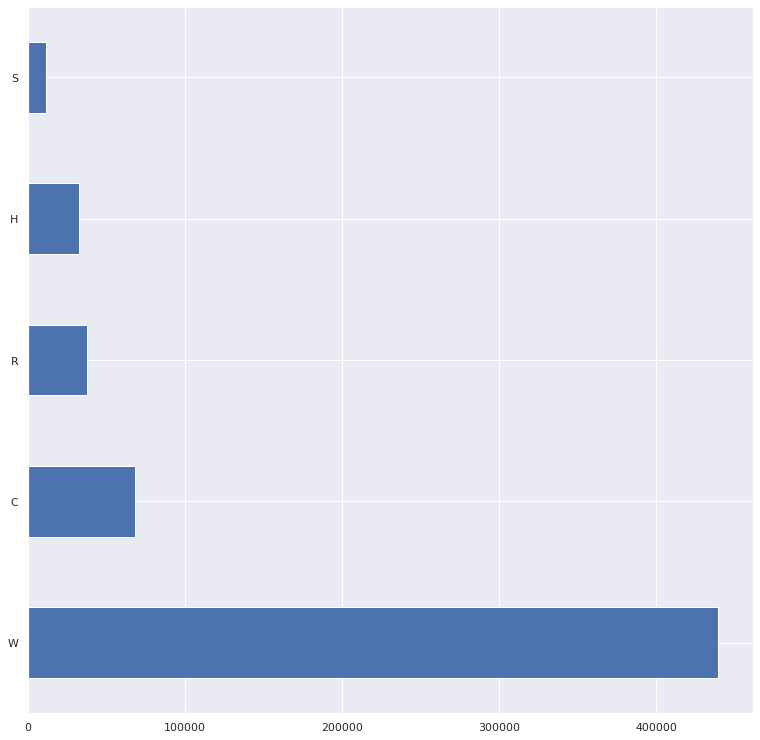

In [19]:
df.ProductCD.value_counts().plot(kind='barh')

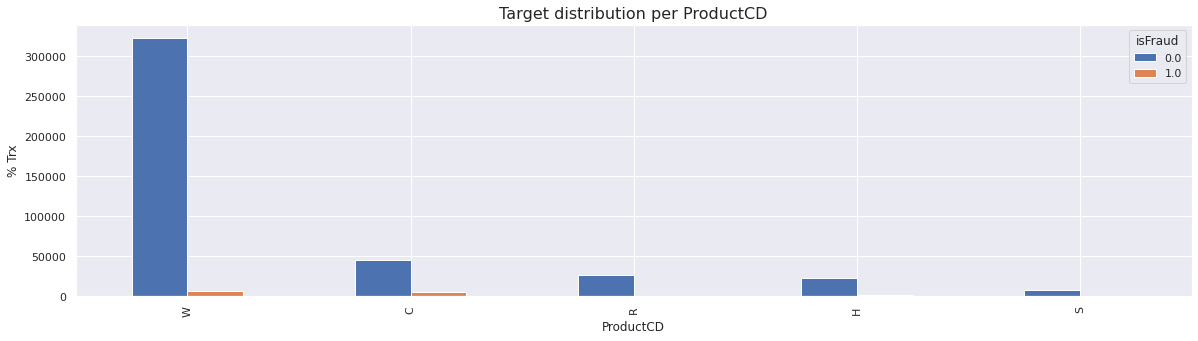


Volume distribution per ProductCD:
        ProductCD   count       percent            Total
isFraud               0.0   1.0     0.0    1.0          
0               C   45251  5993   88.30  11.70   51244.0
3               S    8160   511   94.11   5.89    8671.0
1               H   23551  1190   95.19   4.81   24741.0
2               R   27210  1077   96.19   3.81   28287.0
4               W  323236  6726   97.96   2.04  329962.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [20]:
product_cd = df.groupby(["ProductCD", "isFraud"]).size().to_frame(name = 'count').reset_index()
count_tb = product_cd[["ProductCD","count"]].groupby(["ProductCD"]).sum().reset_index()

product_merge_percent = pd.merge(product_cd, count_tb, how='left', on='ProductCD')
product_merge_percent['percent'] = round((product_merge_percent['count_x']/product_merge_percent['count_y'])*100,2)
product_merge_percent.columns = ['ProductCD', 'isFraud', 'count', 'total', 'percent']

product_cd_p = pd.pivot_table(product_merge_percent, index = 'ProductCD', columns = 'isFraud', values = 'count')
product_cd_p['Total'] = product_cd_p.sum(axis=1)

product_cd_p_sort = product_cd_p.sort_values(by = ["Total"], ascending=False)
product_cd_p_sort.iloc[:,:-1].plot(kind = 'bar', figsize = (20,5), grid = True)

plt.title('Target distribution per ProductCD'.format(5), fontsize = 16)
plt.ylabel("% Trx")
plt.show()

print_feature_graph_p = pd.pivot_table(product_merge_percent, index = "ProductCD", columns = "isFraud", values = ['count','percent']).reset_index()
print_feature_graph_p['Total'] = print_feature_graph_p.sum(axis=1) - 100
print_feature_graph_p = print_feature_graph_p.sort_values(by = ('percent',1), ascending=False).head(10)

print("\nVolume distribution per {}:".format("ProductCD"))
print(print_feature_graph_p)

#### card4

In [21]:
#null values
df.card4.isna().sum()

1577

<AxesSubplot:>

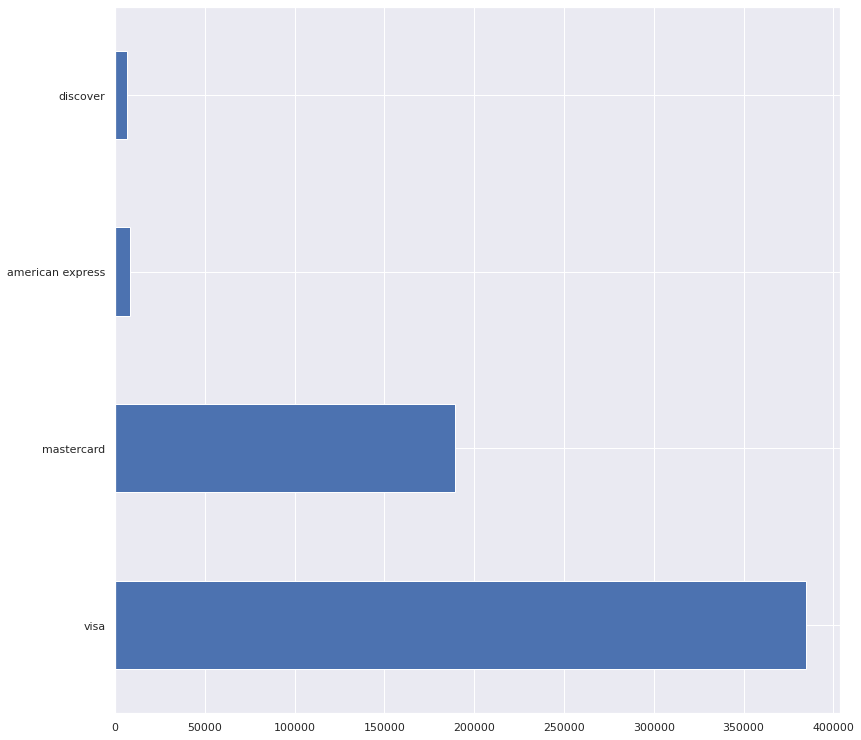

In [22]:
df.card4.value_counts().plot(kind='barh')

In [23]:
#fill null value with mode ("visa")
df["card4"].fillna("visa",inplace=True)

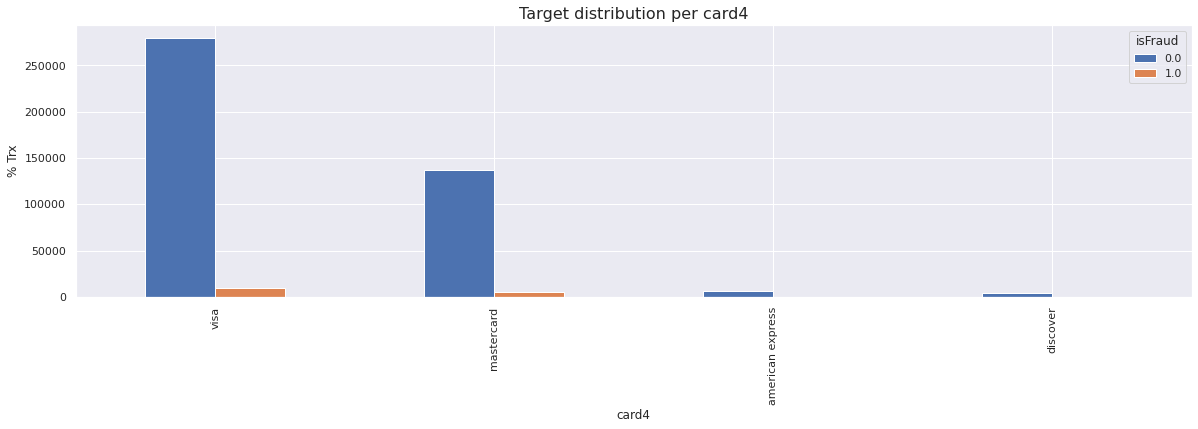


Volume distribution per card4:
                    card4   count       percent           Total
isFraud                       0.0   1.0     0.0   1.0          
1                discover    4574   397   92.01  7.99    4971.0
2              mastercard  137173  4928   96.53  3.47  142101.0
3                    visa  279572  9987   96.55  3.45  289559.0
0        american express    6089   185   97.05  2.95    6274.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [24]:
product_cd = df.groupby(["card4", "isFraud"]).size().to_frame(name = 'count').reset_index()
count_tb = product_cd[["card4","count"]].groupby(["card4"]).sum().reset_index()

product_merge_percent = pd.merge(product_cd, count_tb, how='left', on='card4')
product_merge_percent['percent'] = round((product_merge_percent['count_x']/product_merge_percent['count_y'])*100,2)
product_merge_percent.columns = ['card4', 'isFraud', 'count', 'total', 'percent']

product_cd_p = pd.pivot_table(product_merge_percent, index = 'card4', columns = 'isFraud', values = 'count')
product_cd_p['Total'] = product_cd_p.sum(axis=1)

product_cd_p_sort = product_cd_p.sort_values(by = ["Total"], ascending=False)
product_cd_p_sort.iloc[:,:-1].plot(kind = 'bar', figsize = (20,5), grid = True)

plt.title('Target distribution per card4'.format(5), fontsize = 16)
plt.ylabel("% Trx")
plt.show()

print_feature_graph_p = pd.pivot_table(product_merge_percent, index = "card4", columns = "isFraud", values = ['count','percent']).reset_index()
print_feature_graph_p['Total'] = print_feature_graph_p.sum(axis=1) - 100
print_feature_graph_p = print_feature_graph_p.sort_values(by = ('percent',1), ascending=False).head(10)

print("\nVolume distribution per {}:".format("card4"))
print(print_feature_graph_p)

#### card6

In [25]:
#null values
df.card6.isna().sum()

1571

<AxesSubplot:>

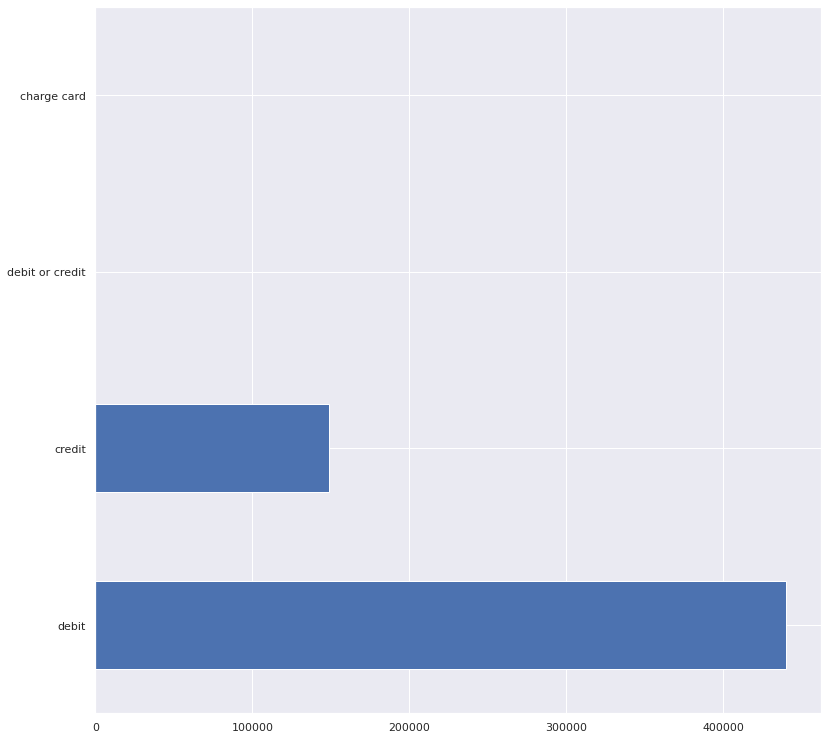

In [26]:
df.card6.value_counts().plot(kind='barh')

In [27]:
#fill null value with mode ("debit")
df["card6"].fillna("debit",inplace=True)

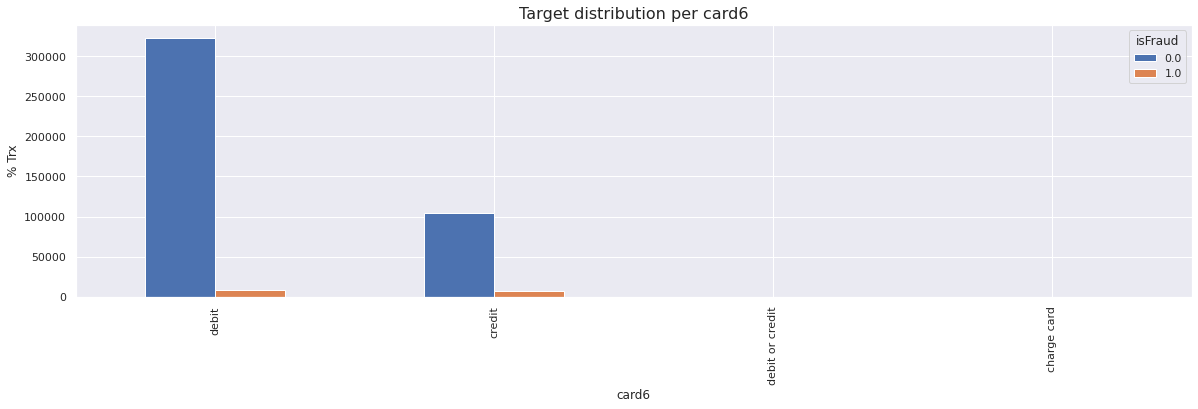


Volume distribution per card6:
                   card6     count         percent           Total
isFraud                        0.0     1.0     0.0   1.0          
1                 credit  104275.0  7443.0   93.34  6.66  111718.0
2                  debit  323098.0  8054.0   97.57  2.43  331152.0
0            charge card      11.0     NaN  100.00   NaN      11.0
3        debit or credit      24.0     NaN  100.00   NaN      24.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [28]:
product_cd = df.groupby(["card6", "isFraud"]).size().to_frame(name = 'count').reset_index()
count_tb = product_cd[["card6","count"]].groupby(["card6"]).sum().reset_index()

product_merge_percent = pd.merge(product_cd, count_tb, how='left', on='card6')
product_merge_percent['percent'] = round((product_merge_percent['count_x']/product_merge_percent['count_y'])*100,2)
product_merge_percent.columns = ['card6', 'isFraud', 'count', 'total', 'percent']

product_cd_p = pd.pivot_table(product_merge_percent, index = 'card6', columns = 'isFraud', values = 'count')
product_cd_p['Total'] = product_cd_p.sum(axis=1)

product_cd_p_sort = product_cd_p.sort_values(by = ["Total"], ascending=False)
product_cd_p_sort.iloc[:,:-1].plot(kind = 'bar', figsize = (20,5), grid = True)

plt.title('Target distribution per card6'.format(5), fontsize = 16)
plt.ylabel("% Trx")
plt.show()

print_feature_graph_p = pd.pivot_table(product_merge_percent, index = "card6", columns = "isFraud", values = ['count','percent']).reset_index()
print_feature_graph_p['Total'] = print_feature_graph_p.sum(axis=1) - 100
print_feature_graph_p = print_feature_graph_p.sort_values(by = ('percent',1), ascending=False).head(10)

print("\nVolume distribution per {}:".format("card6"))
print(print_feature_graph_p)

#### P_emaildomain

In [29]:
#null values
df.P_emaildomain.isna().sum()

94456

In [30]:
#null values when isFruad is 1
df[df['isFraud']==1].P_emaildomain.isna().sum()

2102

In [31]:
#null values when isFruad is 0
df[df['isFraud']==0].P_emaildomain.isna().sum()

68829

In [32]:
df.P_emaildomain.value_counts().head(20)

gmail.com        228355
yahoo.com        100934
hotmail.com       45250
anonymous.com     36998
aol.com           28289
comcast.net        7888
icloud.com         6267
outlook.com        5096
msn.com            4092
att.net            4033
live.com           3041
sbcglobal.net      2970
verizon.net        2705
ymail.com          2396
bellsouth.net      1909
yahoo.com.mx       1543
me.com             1522
cox.net            1393
optonline.net      1011
charter.net         816
Name: P_emaildomain, dtype: int64

<AxesSubplot:>

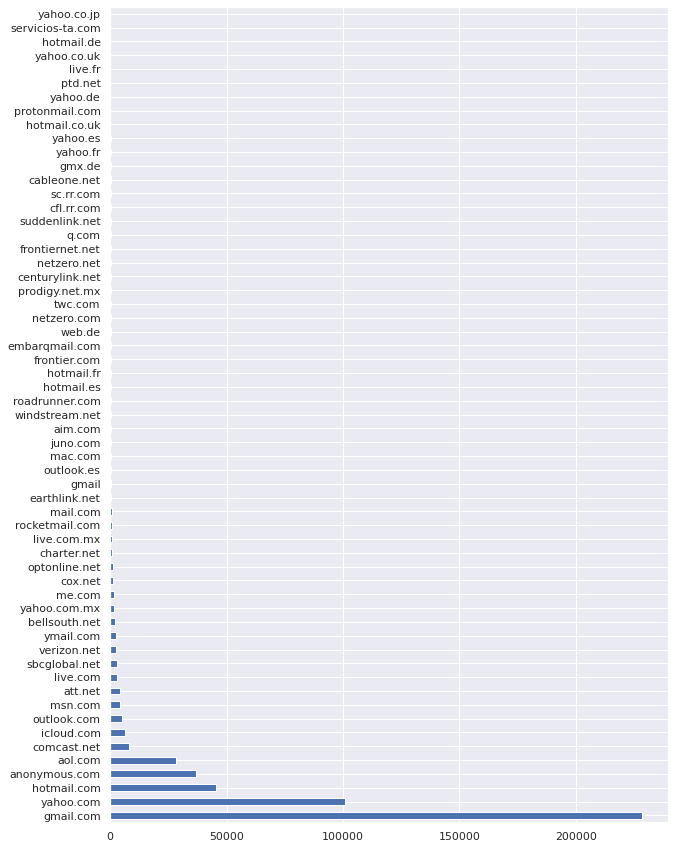

In [33]:
df.P_emaildomain.value_counts().plot(kind='barh',figsize=(10,15))

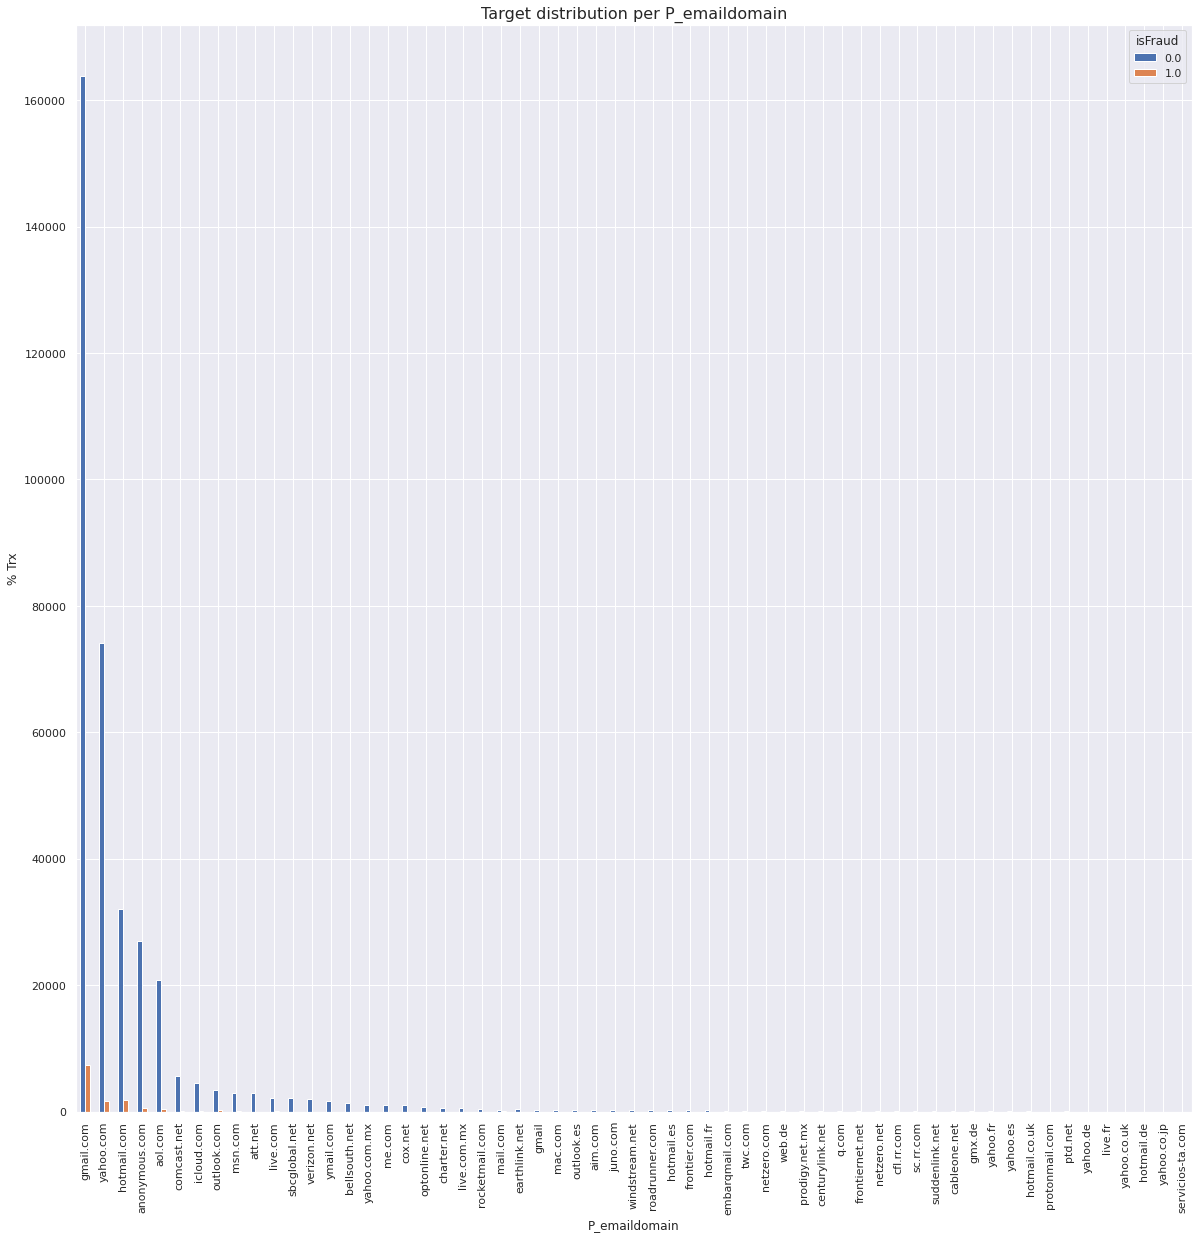


Volume distribution per P_emaildomain:
            P_emaildomain     count         percent            Total
isFraud                         0.0     1.0     0.0    1.0          
16              gmail.com  163752.0  7437.0   95.66   4.34  171189.0
19            hotmail.com   32100.0  1809.0   94.67   5.33   33909.0
53              yahoo.com   74124.0  1726.0   97.72   2.28   75850.0
1           anonymous.com   27070.0   632.0   97.72   2.28   27702.0
2                 aol.com   20778.0   479.0   97.75   2.25   21257.0
35            outlook.com    3404.0   363.0   90.36   9.64    3767.0
9             comcast.net    5647.0   184.0   96.84   3.16    5831.0
23             icloud.com    4589.0   130.0   97.25   2.75    4719.0
29               mail.com     344.0    81.0   80.94  19.06     425.0
31                msn.com    3004.0    68.0   97.79   2.21    3072.0
25               live.com    2236.0    65.0   97.18   2.82    2301.0
36             outlook.es     286.0    47.0   85.89  14.11     

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [34]:
product_cd = df.groupby(["P_emaildomain", "isFraud"]).size().to_frame(name = 'count').reset_index()
count_tb = product_cd[["P_emaildomain","count"]].groupby(["P_emaildomain"]).sum().reset_index()

product_merge_percent = pd.merge(product_cd, count_tb, how='left', on='P_emaildomain')
product_merge_percent['percent'] = round((product_merge_percent['count_x']/product_merge_percent['count_y'])*100,2)
product_merge_percent.columns = ['P_emaildomain', 'isFraud', 'count', 'total', 'percent']

product_cd_p = pd.pivot_table(product_merge_percent, index = 'P_emaildomain', columns = 'isFraud', values = 'count')
product_cd_p['Total'] = product_cd_p.sum(axis=1)

product_cd_p_sort = product_cd_p.sort_values(by = ["Total"], ascending=False)
product_cd_p_sort.iloc[:,:-1].plot(kind = 'bar', figsize = (20,20), grid = True)

plt.title('Target distribution per P_emaildomain'.format(5), fontsize = 16)
plt.ylabel("% Trx")
plt.show()

print_feature_graph_p = pd.pivot_table(product_merge_percent, index = "P_emaildomain", columns = "isFraud", values = ['count','percent']).reset_index()
print_feature_graph_p['Total'] = print_feature_graph_p.sum(axis=1) - 100
print_feature_graph_p = print_feature_graph_p.sort_values(by = ('count',1), ascending=False)

print("\nVolume distribution per {}:".format("P_emaildomain"))
print(print_feature_graph_p)

In [35]:
s = df.P_emaildomain.value_counts(normalize=True)
s.head(20)

gmail.com        0.460315
yahoo.com        0.203462
hotmail.com      0.091214
anonymous.com    0.074580
aol.com          0.057025
comcast.net      0.015901
icloud.com       0.012633
outlook.com      0.010272
msn.com          0.008249
att.net          0.008130
live.com         0.006130
sbcglobal.net    0.005987
verizon.net      0.005453
ymail.com        0.004830
bellsouth.net    0.003848
yahoo.com.mx     0.003110
me.com           0.003068
cox.net          0.002808
optonline.net    0.002038
charter.net      0.001645
Name: P_emaildomain, dtype: float64

In [36]:
missing = df['P_emaildomain'].isnull()
missing.head()

0    False
1    False
2    False
3    False
4    False
Name: P_emaildomain, dtype: bool

In [37]:
#distributing null values according to original distribution
df.loc[missing,'P_emaildomain'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [38]:
df.P_emaildomain.isna().sum()

0

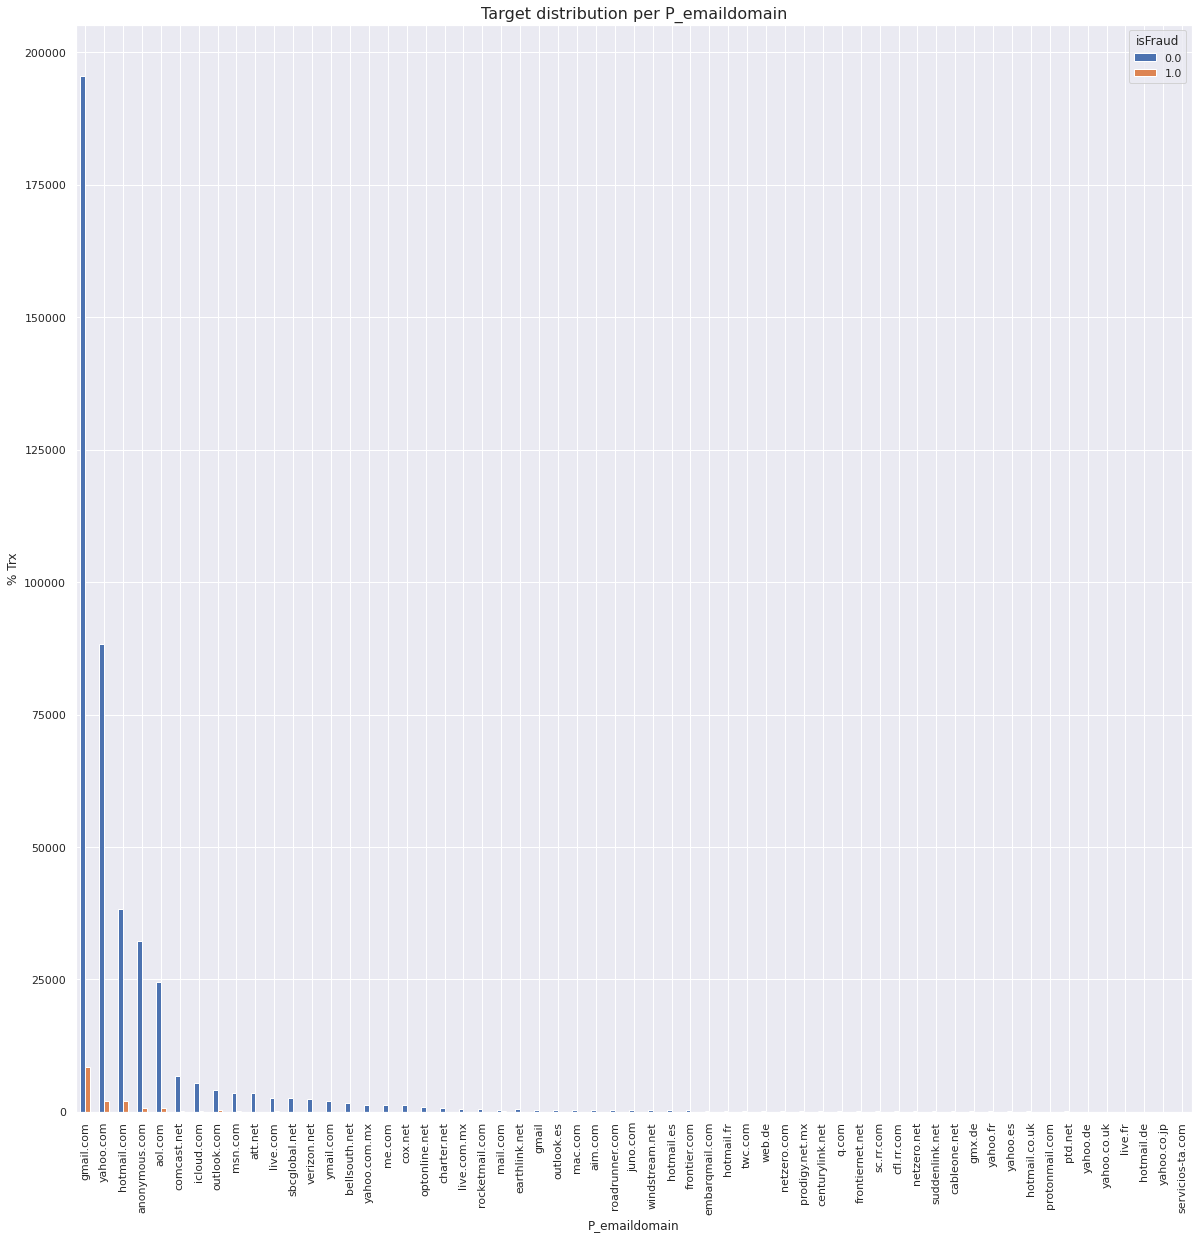


Volume distribution per P_emaildomain:
            P_emaildomain     count         percent            Total
isFraud                         0.0     1.0     0.0    1.0          
16              gmail.com  195470.0  8396.0   95.88   4.12  203866.0
53              yahoo.com   88300.0  2132.0   97.64   2.36   90432.0
19            hotmail.com   38272.0  1991.0   95.06   4.94   40263.0
1           anonymous.com   32224.0   800.0   97.58   2.42   33024.0
2                 aol.com   24545.0   625.0   97.52   2.48   25170.0
35            outlook.com    4110.0   384.0   91.46   8.54    4494.0
9             comcast.net    6778.0   226.0   96.77   3.23    7004.0
23             icloud.com    5474.0   156.0   97.23   2.77    5630.0
29               mail.com     424.0    85.0   83.30  16.70     509.0
31                msn.com    3594.0    83.0   97.74   2.26    3677.0
25               live.com    2664.0    80.0   97.08   2.92    2744.0
36             outlook.es     351.0    47.0   88.19  11.81     

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


In [39]:
product_cd = df.groupby(["P_emaildomain", "isFraud"]).size().to_frame(name = 'count').reset_index()
count_tb = product_cd[["P_emaildomain","count"]].groupby(["P_emaildomain"]).sum().reset_index()

product_merge_percent = pd.merge(product_cd, count_tb, how='left', on='P_emaildomain')
product_merge_percent['percent'] = round((product_merge_percent['count_x']/product_merge_percent['count_y'])*100,2)
product_merge_percent.columns = ['P_emaildomain', 'isFraud', 'count', 'total', 'percent']

product_cd_p = pd.pivot_table(product_merge_percent, index = 'P_emaildomain', columns = 'isFraud', values = 'count')
product_cd_p['Total'] = product_cd_p.sum(axis=1)

product_cd_p_sort = product_cd_p.sort_values(by = ["Total"], ascending=False)
product_cd_p_sort.iloc[:,:-1].plot(kind = 'bar', figsize = (20,20), grid = True)

plt.title('Target distribution per P_emaildomain'.format(5), fontsize = 16)
plt.ylabel("% Trx")
plt.show()

print_feature_graph_p = pd.pivot_table(product_merge_percent, index = "P_emaildomain", columns = "isFraud", values = ['count','percent']).reset_index()
print_feature_graph_p['Total'] = print_feature_graph_p.sum(axis=1) - 100
print_feature_graph_p = print_feature_graph_p.sort_values(by = ('count',1), ascending=False)

print("\nVolume distribution per {}:".format("P_emaildomain"))
print(print_feature_graph_p)

In [40]:
df.loc[df["P_emaildomain"].isin(['cfl.rr.com',"gmx.de","hotmail.co.uk","hotmail.de","netzero.com","ptd.net","servicios-ta.com","twc.com","web.de","windstream.net","yahoo.co.jp","yahoo.co.uk"]), "P_emaildomain"] = "goodmail"

In [41]:
#48 categories we handle it using one-hot encoding
df.P_emaildomain.value_counts().shape

(48,)

#### M6

In [42]:
#null values
df.M6.isna().sum()

169360

In [43]:
df.M6.value_counts()

F    227856
T    193324
Name: M6, dtype: int64

<AxesSubplot:>

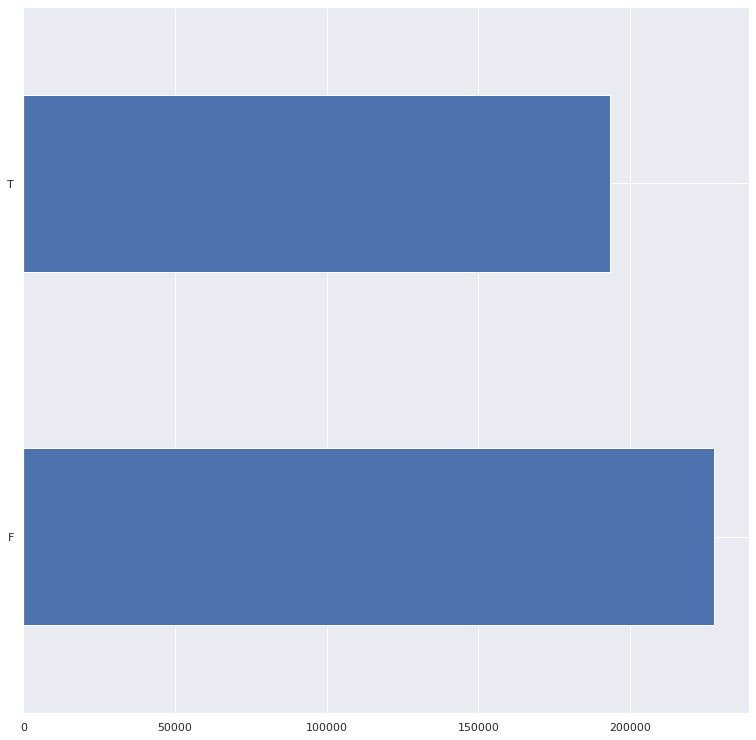

In [44]:
df.M6.value_counts().plot(kind='barh')

In [45]:
s = df.M6.value_counts(normalize=True)
s

F    0.540994
T    0.459006
Name: M6, dtype: float64

In [46]:
missing = df['M6'].isnull()
missing.head()

0    False
1    False
2    False
3     True
4    False
Name: M6, dtype: bool

In [47]:
#distributing F,T in null values according to original distribution
df.loc[missing,'M6'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [48]:
df.M6.isna().sum()

0

In [49]:
df.M6.value_counts()

F    319846
T    270694
Name: M6, dtype: int64

#### we will convert M6 column using Lable encoder into numerics
**F --> 0** \
**T --> 1**

In [50]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['M6']= label_encoder.fit_transform(df['M6'])
  
df['M6'].unique()

array([0, 1])

In [51]:
df.M6.value_counts()

0    319846
1    270694
Name: M6, dtype: int64

#### we will handle categorical columns ProductCD, card4, card6, P_emaildomain

In [52]:
# generate binary values using get_dummies
df = pd.get_dummies(df, columns=["ProductCD","card4","card6","P_emaildomain"], prefix=["ProductCD_is","card4_is","card6_is","P_emaildomain_is"] )
# merge with main df bridge_df on key values

In [53]:
df.head()

TransactionID  isFraud  TransactionDT  TransactionAmt  card1  card2  card3  \
0        3424175      0.0       11053717           49.00   5033  269.0  150.0   
1        3206179      0.0        5150800           57.95   4527  376.0  150.0   
2        3410455      0.0       10713596          115.95   2772  512.0  150.0   
3        3058578      0.0        1611950          100.00  14290  512.0  150.0   
4        3242131      0.0        6111087           95.00  12839  321.0  150.0   

   card5  addr1  addr2    C1    C2   C3   C4     C5    C6   C7   C8    C9  \
0  224.0  330.0   87.0   2.0   2.0  0.0  0.0    0.0   1.0  0.0  0.0   1.0   
1  226.0  441.0   87.0   2.0   2.0  0.0  0.0    1.0   2.0  0.0  0.0   2.0   
2  226.0  143.0   87.0   2.0   1.0  0.0  0.0    1.0   1.0  0.0  0.0   1.0   
3  226.0  177.0   87.0   1.0   1.0  0.0  1.0    0.0   1.0  0.0  1.0   0.0   
4  226.0  220.0   87.0  84.0  87.0  0.0  0.0  142.0  69.0  0.0  0.0  48.0   

   C10   C11  C12    C13   C14     D1     D4    D10    D15  M6  V12  V13  V14  \
0  0.0   1.0  1.0   21.0   2.0   14.0  370.0   14.0  375.0   0  1.0  1.0  1.0   
1  0.0   2.0  0.0   14.0   2.0  136.0  136.0  136.0  136.0   0  1.0  1.0  1.0   
2  0.0   1.0  0.0   14.0   2.0  193.0  495.0  495.0  495.0   1  1.0  1.0  1.0   
3  1.0   1.0  0.0    1.0   1.0    0.0    0.0    0.0    0.0   0  0.0  0.0  1.0   
4  0.0  54.0  0.0  483.0  74.0   35.0  566.0   76.0  559.0   0  1.0  1.0  1.0   

   V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  \
0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
2  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   
3  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0   

   V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  \
0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
1  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
2  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   
3  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
4  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0   

   V45  V46  V47  V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  \
0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
2  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
3  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  1.0  1.0  2.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0   

   V60  V61  V62  V63  V64  V65  V66  V67  V68  V69  V70  V71  V72  V73  V74  \
0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
1  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
2  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
4  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0   

   V75  V76  V77  V78  V79  V80  V81  V82  V83  V84  V85  V86  V87  V88  V89  \
0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  2.0  0.0  0.0  1.0  1.0  1.0  0.0   
1  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   
2  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   
3  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0   
4  1.0  1.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0   

   V90  V91  V92  V93  V94  V95  V96  V97  V98  V99  V100  V101  V102  V103  \
0  0.0  0.0  0.0  0.0  0.0  0.0  2.0  0.0  0.0  2.0   0.0   0.0   0.0   0.0   
1  

In [54]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 147634
Data columns (total 259 columns):
 #    Column                            Non-Null Count   Dtype  
---   ------                            --------------   -----  
 0    TransactionID                     590540 non-null  int64  
 1    isFraud                           442905 non-null  float64
 2    TransactionDT                     590540 non-null  int64  
 3    TransactionAmt                    590540 non-null  float64
 4    card1                             590540 non-null  int64  
 5    card2                             581607 non-null  float64
 6    card3                             588975 non-null  float64
 7    card5                             586281 non-null  float64
 8    addr1                             524834 non-null  float64
 9    addr2                             524834 non-null  float64
 10   C1                                590540 non-null  float64
 11   C2                                590

In [55]:
## downcasting loop
for column in df:
    if df[column].dtype == 'float64':
        df[column]=pd.to_numeric(df[column], downcast='float')
    if df[column].dtype == 'int64':
        df[column]=pd.to_numeric(df[column], downcast='integer')

In [56]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 147634
Data columns (total 259 columns):
 #    Column                            Non-Null Count   Dtype  
---   ------                            --------------   -----  
 0    TransactionID                     590540 non-null  int32  
 1    isFraud                           442905 non-null  float32
 2    TransactionDT                     590540 non-null  int32  
 3    TransactionAmt                    590540 non-null  float32
 4    card1                             590540 non-null  int16  
 5    card2                             581607 non-null  float32
 6    card3                             588975 non-null  float32
 7    card5                             586281 non-null  float32
 8    addr1                             524834 non-null  float32
 9    addr2                             524834 non-null  float32
 10   C1                                590540 non-null  float32
 11   C2                                590

## Handle numerical values

In [57]:
l=[]
for column in df:
    if df[column].isna().sum()>0:
        l.append(column)
l

['isFraud',
 'card2',
 'card3',
 'card5',
 'addr1',
 'addr2',
 'D1',
 'D4',
 'D10',
 'D15',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'V29',
 'V30',
 'V31',
 'V32',
 'V33',
 'V34',
 'V35',
 'V36',
 'V37',
 'V38',
 'V39',
 'V40',
 'V41',
 'V42',
 'V43',
 'V44',
 'V45',
 'V46',
 'V47',
 'V48',
 'V49',
 'V50',
 'V51',
 'V52',
 'V53',
 'V54',
 'V55',
 'V56',
 'V57',
 'V58',
 'V59',
 'V60',
 'V61',
 'V62',
 'V63',
 'V64',
 'V65',
 'V66',
 'V67',
 'V68',
 'V69',
 'V70',
 'V71',
 'V72',
 'V73',
 'V74',
 'V75',
 'V76',
 'V77',
 'V78',
 'V79',
 'V80',
 'V81',
 'V82',
 'V83',
 'V84',
 'V85',
 'V86',
 'V87',
 'V88',
 'V89',
 'V90',
 'V91',
 'V92',
 'V93',
 'V94',
 'V95',
 'V96',
 'V97',
 'V98',
 'V99',
 'V100',
 'V101',
 'V102',
 'V103',
 'V104',
 'V105',
 'V106',
 'V107',
 'V108',
 'V109',
 'V110',
 'V111',
 'V112',
 'V113',
 'V114',
 'V115',
 'V116',
 'V117',
 'V118',
 'V119',
 'V120',
 'V121',
 'V122

#### card2 card3 card5 

In [58]:
df.card2.isna().sum()

8933

In [59]:
df.card3.isna().sum()

1565

In [60]:
df.card5.isna().sum()

4259

In [61]:
# df.card2.value_counts()

In [62]:
# df.card3.value_counts()

In [63]:
# df.card5.value_counts()

In [64]:
s = df.card2.value_counts(normalize=True)
missing = df['card2'].isnull()
#distributing  null values according to original distribution
df.loc[missing,'card2'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [65]:
s = df.card3.value_counts(normalize=True)
missing = df['card3'].isnull()
#distributing null values according to original distribution
df.loc[missing,'card3'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [66]:
s = df.card5.value_counts(normalize=True)
missing = df['card5'].isnull()
#distributing null values according to original distribution
df.loc[missing,'card5'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [67]:
df.card2.isna().sum()

0

In [68]:
df.card3.isna().sum()

0

In [69]:
df.card5.isna().sum()

0

<AxesSubplot:xlabel='card2', ylabel='Count'>

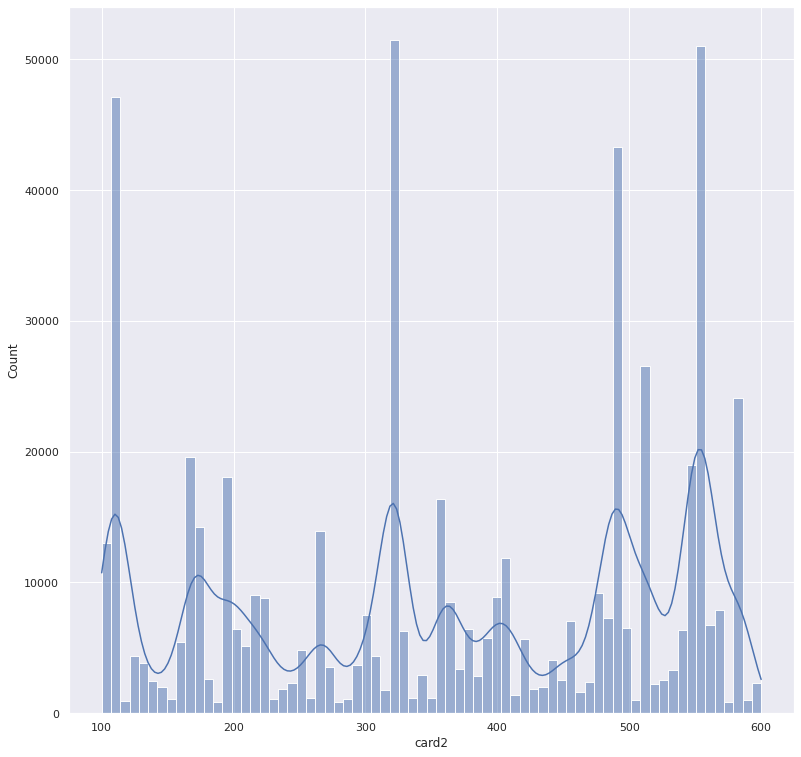

In [70]:
sns.histplot(df["card2"],kde=True)

<AxesSubplot:xlabel='card3', ylabel='Count'>

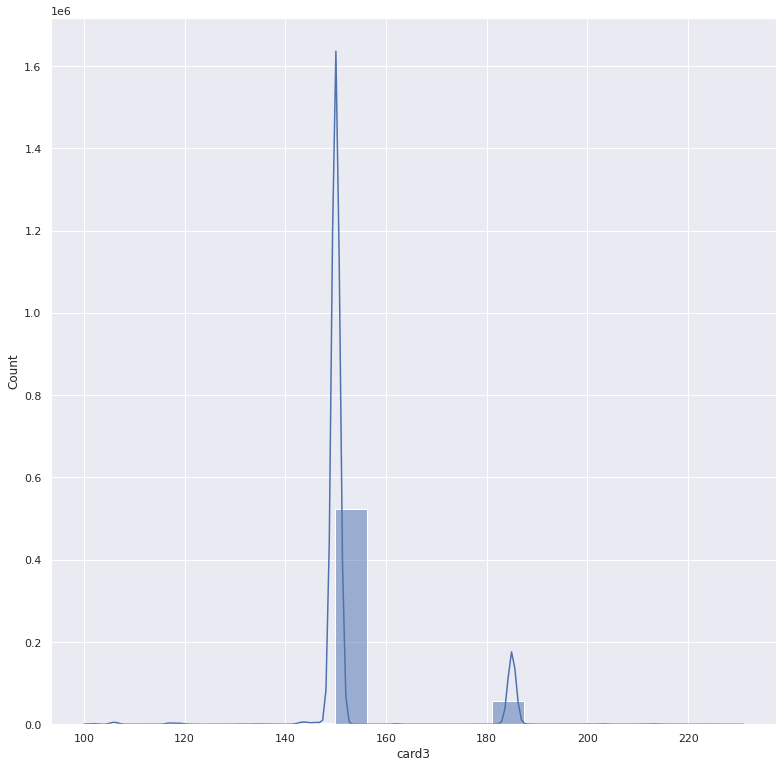

In [71]:
sns.histplot(df["card3"],kde=True)

<AxesSubplot:xlabel='card5', ylabel='Count'>

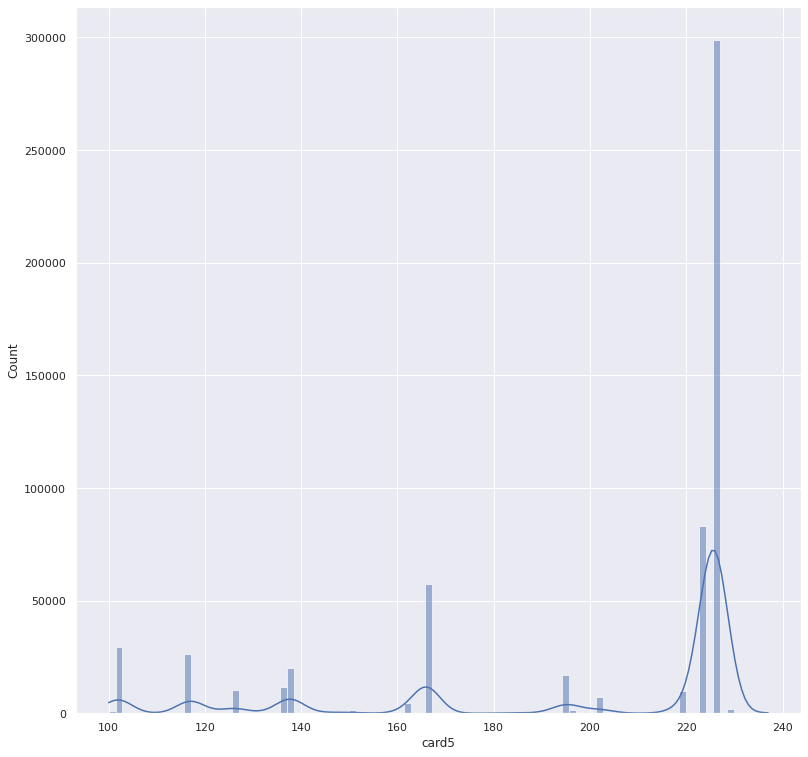

In [72]:
sns.histplot(df["card5"],kde=True)

<AxesSubplot:xlabel='card1', ylabel='Count'>

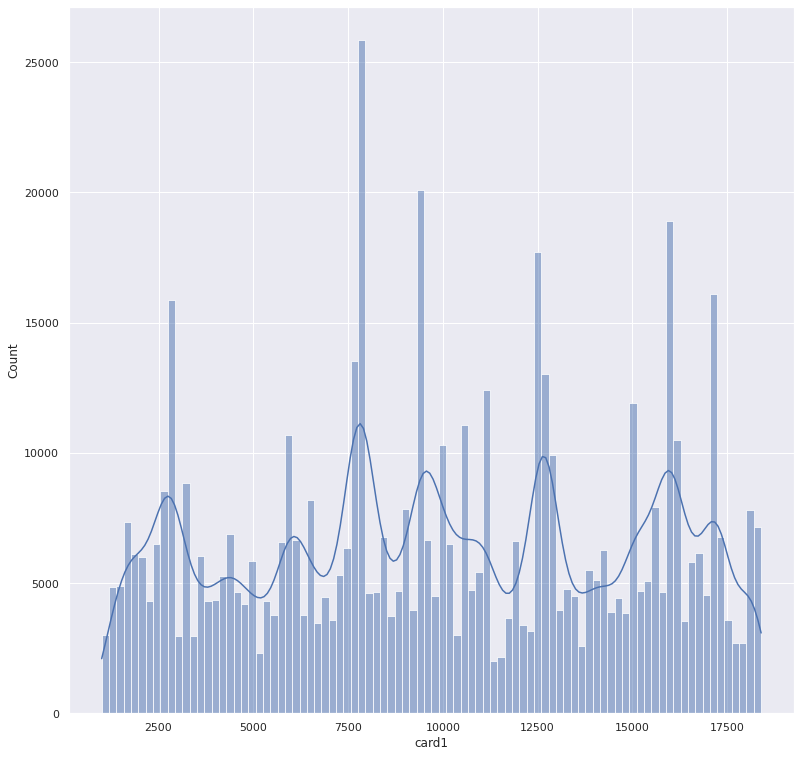

In [73]:
sns.histplot(df["card1"],kde=True)

In [74]:
new_df = df[['card1','card2','card3','card5','isFraud']].copy()

<AxesSubplot:>

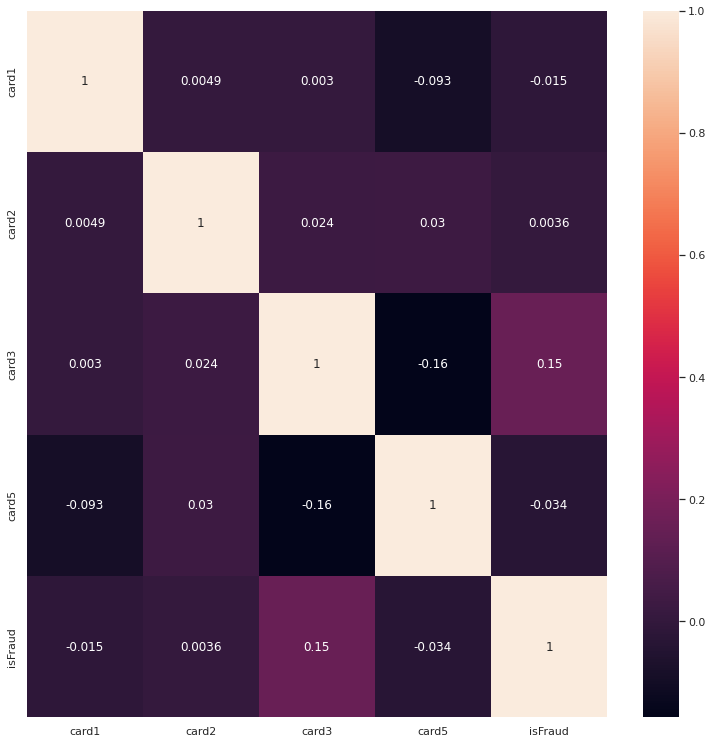

In [75]:
sns.heatmap(new_df.corr(),annot=True)

#### addr1 and addr2

In [76]:
# df.addr1.value_counts()

In [77]:
# df.addr2.value_counts()

<AxesSubplot:xlabel='addr1', ylabel='Count'>

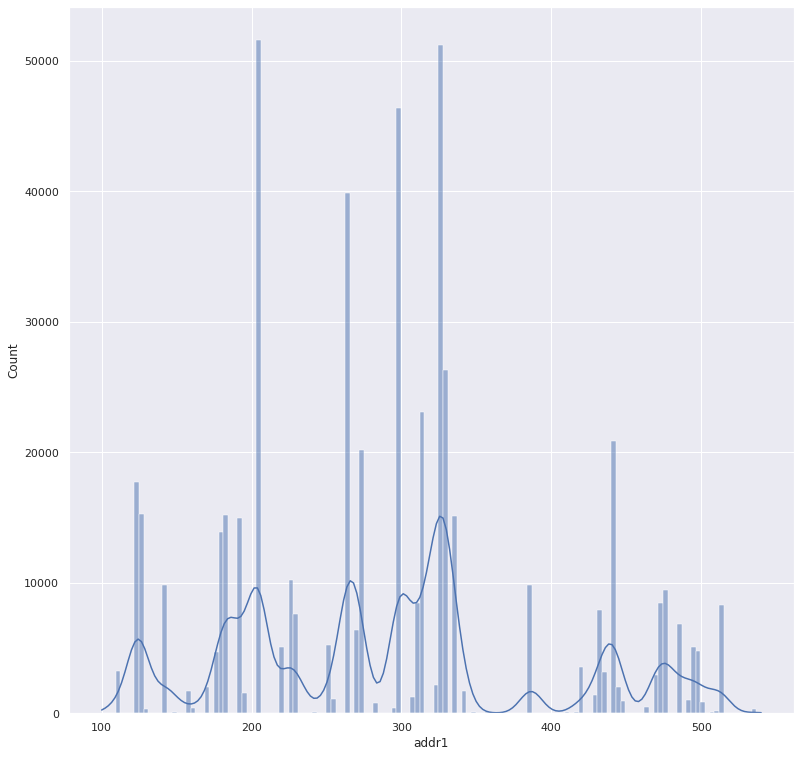

In [78]:
sns.histplot(df["addr1"],kde=True)

<AxesSubplot:xlabel='addr2', ylabel='Count'>

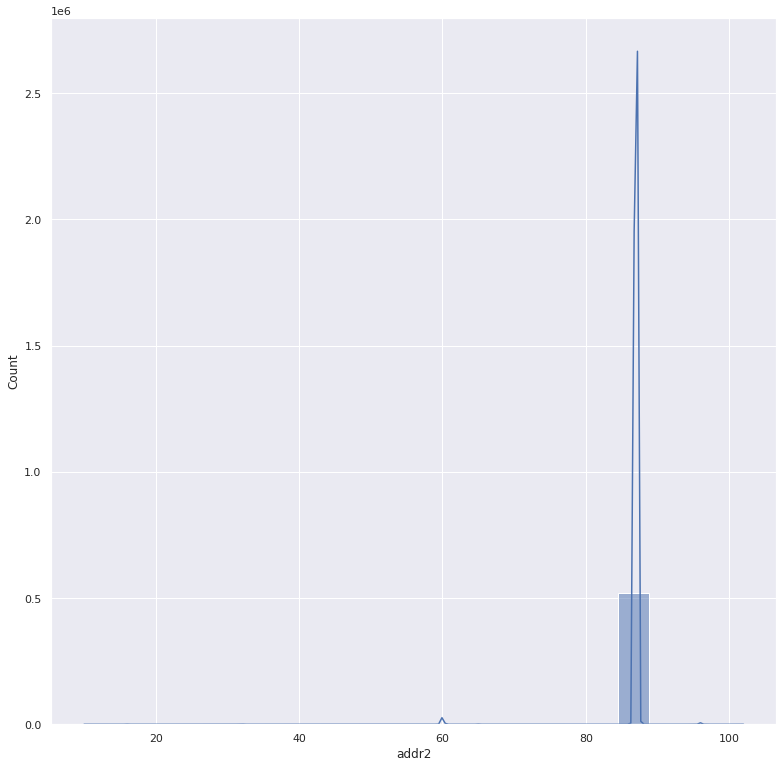

In [79]:
sns.histplot(df["addr2"],kde=True)

In [80]:
df.addr1.isna().sum()

65706

In [81]:
df.addr2.isna().sum()

65706

In [82]:
s = df.addr1.value_counts(normalize=True)
missing = df['addr1'].isnull()
#filling null values according to original distribution
df.loc[missing,'addr1'] = np.random.choice(s.index, size=len(df[missing]),p=s.values)

In [83]:
#filling null value with mode
df["addr2"].fillna(df["addr2"].mode()[0],inplace=True)

In [84]:
new_df = df[['addr1','addr2','isFraud']].copy()

<AxesSubplot:>

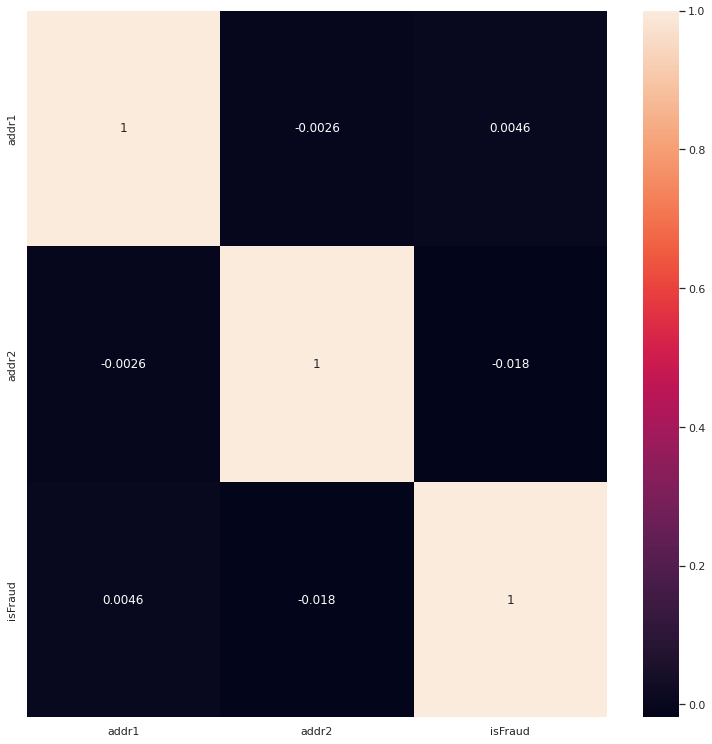

In [85]:
sns.heatmap(new_df.corr(),annot=True)

#### D1, D4, D10 ,D15

In [86]:
# df.D1.value_counts()

<AxesSubplot:xlabel='D1', ylabel='Count'>

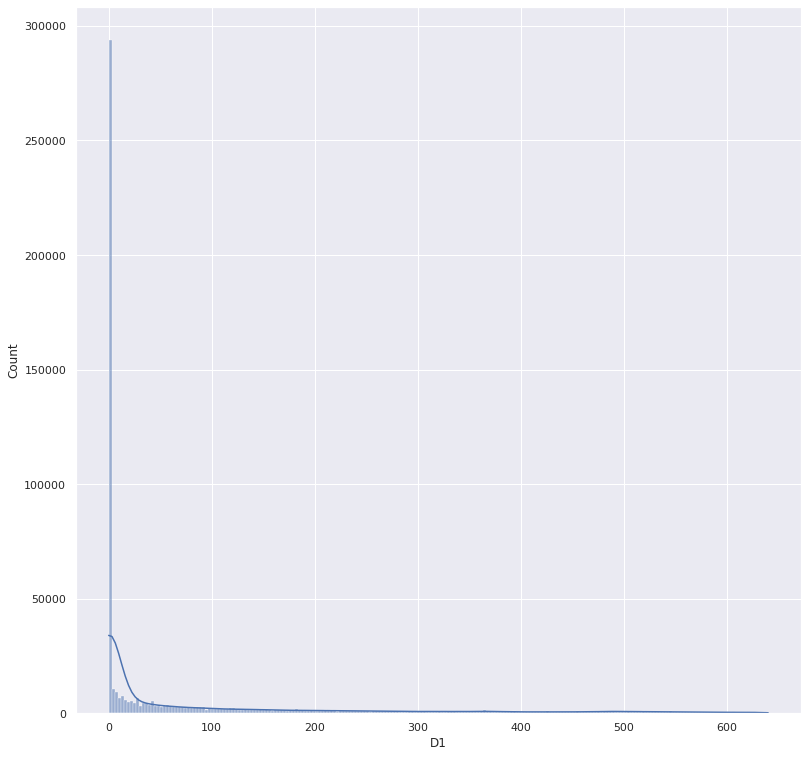

In [87]:
sns.histplot(df["D1"],kde=True)

<AxesSubplot:xlabel='D4', ylabel='Count'>

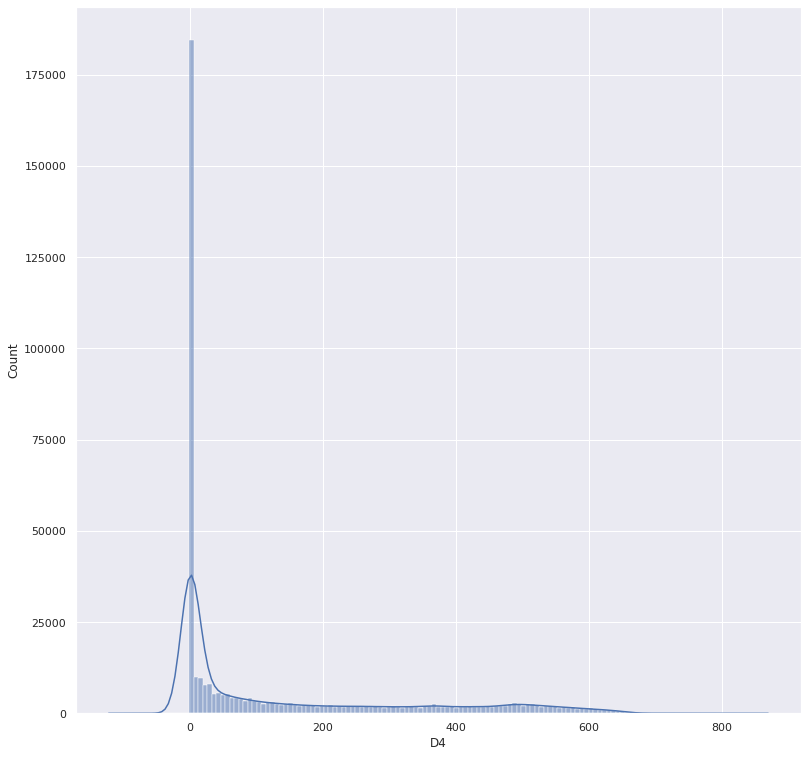

In [88]:
sns.histplot(df["D4"],kde=True)

<AxesSubplot:xlabel='D10', ylabel='Count'>

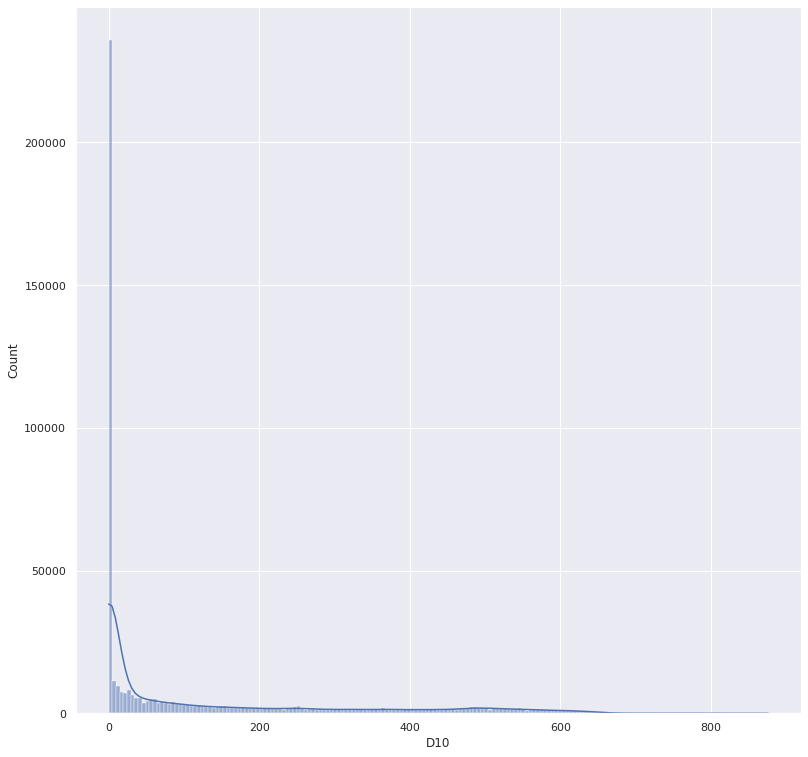

In [89]:
sns.histplot(df["D10"],kde=True)

<AxesSubplot:xlabel='D15', ylabel='Count'>

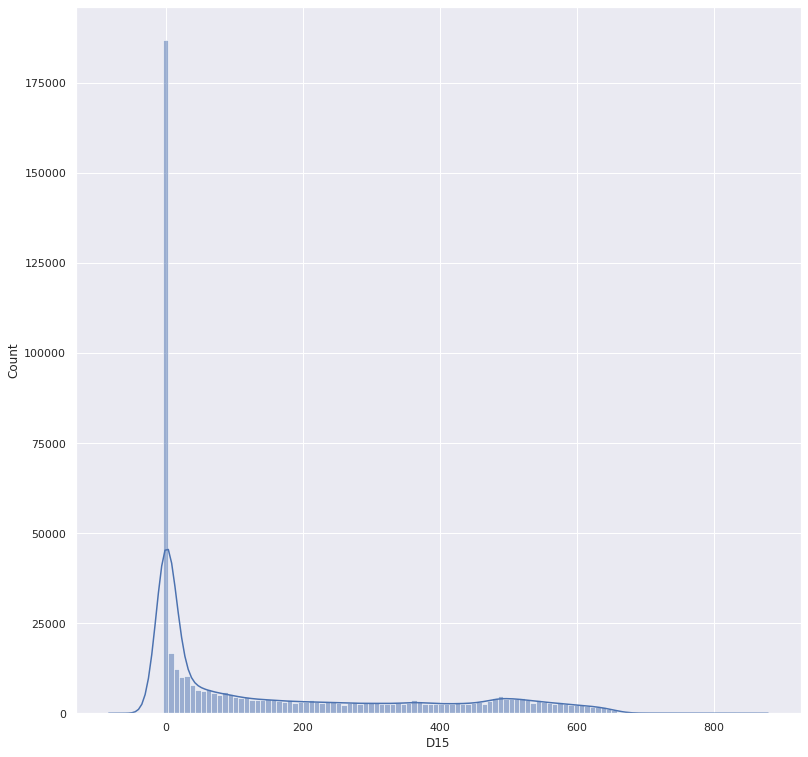

In [90]:
sns.histplot(df["D15"],kde=True)

In [91]:
#filling null value with mode
df["D1"].fillna(df['D1'].mode()[0],inplace=True)

In [92]:
#filling null value with mode
df["D4"].fillna(df['D4'].mode()[0],inplace=True)

In [93]:
#filling null value with mode
df["D15"].fillna(df['D15'].mode()[0],inplace=True)

In [94]:
#filling null value with mode
df["D10"].fillna(df['D10'].mode()[0],inplace=True)

In [95]:
new_df = df[['D1','D4','D15','D10','isFraud']].copy()

In [96]:
corr_df=new_df.corr()

<AxesSubplot:>

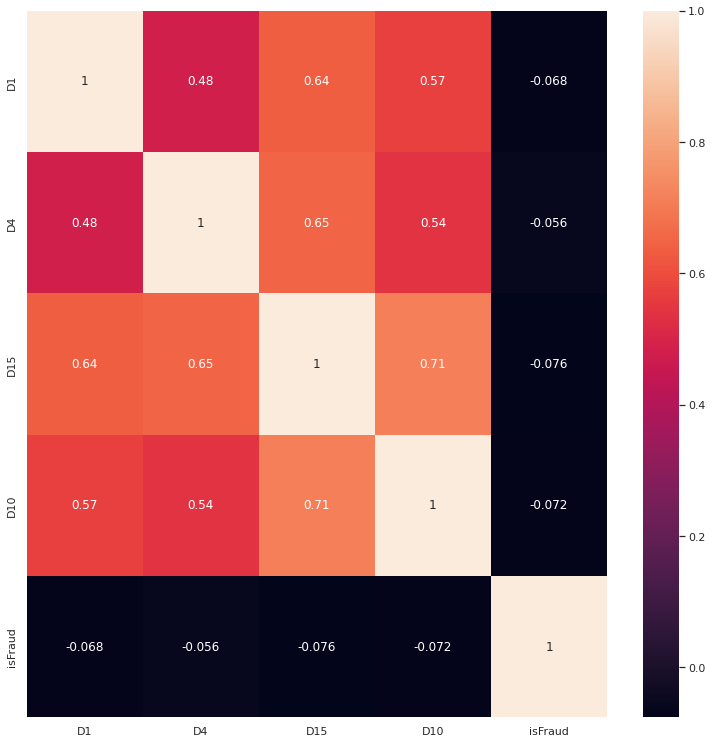

In [97]:
sns.heatmap(corr_df,annot=True)

#### C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14

In [98]:
new_df=df[["C1","C2","C3","C4","C5","C6","C7","C8","C9","C10","C11","C12","C13","C14","isFraud"]].copy()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

<AxesSubplot:xlabel='C14', ylabel='Density'>

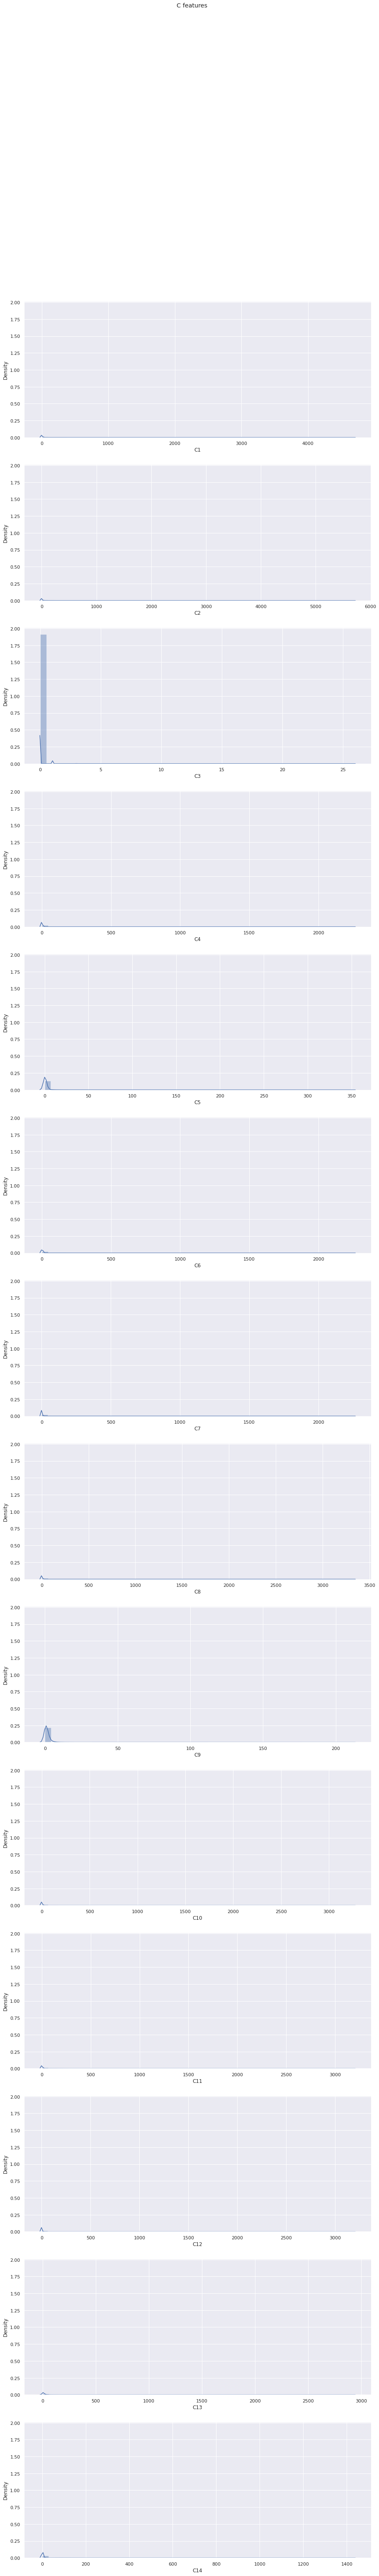

In [99]:
fig, axes = plt.subplots(14, 1, figsize=(15, 100), sharey=True)
fig.suptitle('C features')
sns.distplot(new_df["C1"],ax=axes[0],kde=True)
sns.distplot(new_df["C2"],ax=axes[1],kde=True)
sns.distplot(new_df["C3"],ax=axes[2],kde=True)
sns.distplot(new_df["C4"],ax=axes[3],kde=True)
sns.distplot(new_df["C5"],ax=axes[4],kde=True)
sns.distplot(new_df["C6"],ax=axes[5],kde=True)
sns.distplot(new_df["C7"],ax=axes[6],kde=True)
sns.distplot(new_df["C8"],ax=axes[7],kde=True)
sns.distplot(new_df["C9"],ax=axes[8],kde=True)
sns.distplot(new_df["C10"],ax=axes[9],kde=True)
sns.distplot(new_df["C11"],ax=axes[10],kde=True)
sns.distplot(new_df["C12"],ax=axes[11],kde=True)
sns.distplot(new_df["C13"],ax=axes[12],kde=True)
sns.distplot(new_df["C14"],ax=axes[13],kde=True)

In [100]:
corr_df=new_df.corr()

<AxesSubplot:>

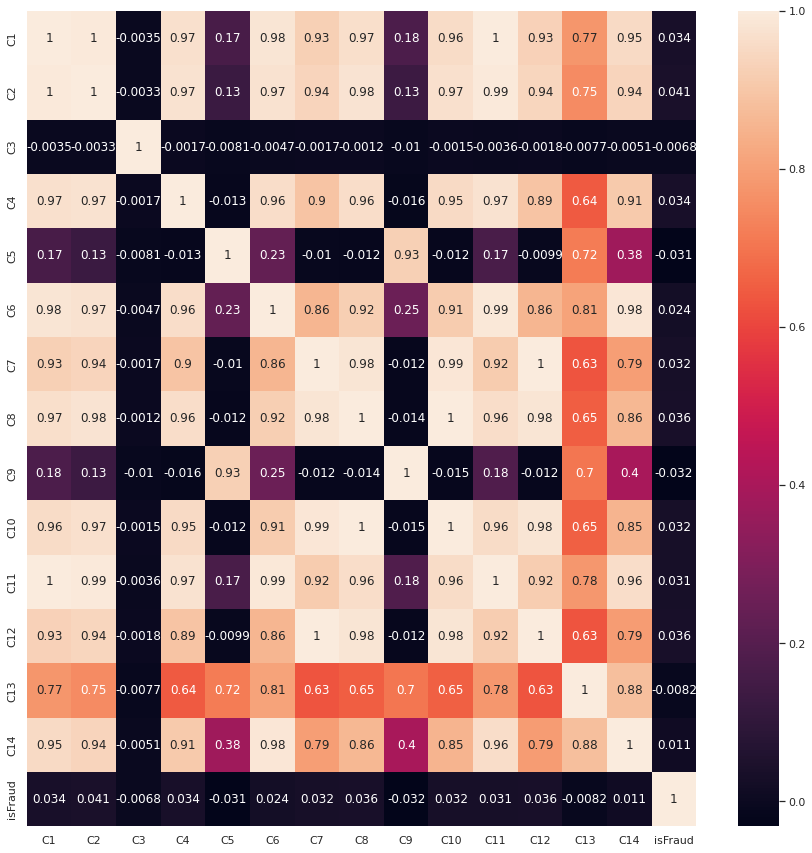

In [101]:
fig, axes = plt.subplots(1, 1, figsize=(15, 15), sharey=True)
sns.heatmap(corr_df,annot=True)

In [102]:
# use at last on entire data set
cor_matrix = corr_df.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

['C2', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C14']


#### Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.

In [103]:
v_feature=[]
for column in df.columns:
    if "V" in column:
        v_feature.append(column)

In [104]:
v_feature.append("isFraud")

In [105]:
new_df=df[v_feature].copy()

In [106]:
for column in new_df:
    print("{}:{}".format(column,new_df[column].isna().sum()))

V12:76073
V13:76073
V14:76073
V15:76073
V16:76073
V17:76073
V18:76073
V19:76073
V20:76073
V21:76073
V22:76073
V23:76073
V24:76073
V25:76073
V26:76073
V27:76073
V28:76073
V29:76073
V30:76073
V31:76073
V32:76073
V33:76073
V34:76073
V35:168969
V36:168969
V37:168969
V38:168969
V39:168969
V40:168969
V41:168969
V42:168969
V43:168969
V44:168969
V45:168969
V46:168969
V47:168969
V48:168969
V49:168969
V50:168969
V51:168969
V52:168969
V53:77096
V54:77096
V55:77096
V56:77096
V57:77096
V58:77096
V59:77096
V60:77096
V61:77096
V62:77096
V63:77096
V64:77096
V65:77096
V66:77096
V67:77096
V68:77096
V69:77096
V70:77096
V71:77096
V72:77096
V73:77096
V74:77096
V75:89164
V76:89164
V77:89164
V78:89164
V79:89164
V80:89164
V81:89164
V82:89164
V83:89164
V84:89164
V85:89164
V86:89164
V87:89164
V88:89164
V89:89164
V90:89164
V91:89164
V92:89164
V93:89164
V94:89164
V95:314
V96:314
V97:314
V98:314
V99:314
V100:314
V101:314
V102:314
V103:314
V104:314
V105:314
V106:314
V107:314
V108:314
V109:314
V110:314
V111:314
V112

In [107]:
# for column in new_df:
#     print("{}".format(column))
#     print("{}".format(new_df[column].value_counts()))

In [108]:
# fill missing value with data with mode of each column
for column in new_df:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [109]:
corr_df=new_df.corr()

In [110]:
fig, axes = plt.subplots(1, 1, figsize=(169, 169), sharey=True)
sns.heatmap(corr_df)

<AxesSubplot:>

In [111]:
# use at last on entire data set
cor_matrix = corr_df.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

['V13', 'V16', 'V18', 'V20', 'V21', 'V22', 'V28', 'V30', 'V31', 'V32', 'V33', 'V34', 'V36', 'V40', 'V42', 'V43', 'V45', 'V48', 'V49', 'V50', 'V51', 'V52', 'V54', 'V57', 'V58', 'V59', 'V60', 'V63', 'V64', 'V68', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V76', 'V79', 'V80', 'V81', 'V84', 'V85', 'V88', 'V89', 'V90', 'V91', 'V92', 'V93', 'V94', 'V96', 'V97', 'V101', 'V102', 'V103', 'V105', 'V106', 'V113', 'V126', 'V127', 'V128', 'V132', 'V133', 'V134', 'V137', 'V279', 'V280', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V301', 'V302', 'V304', 'V306', 'V307', 'V308', 'V309', 'V315', 'V316', 'V317', 'V318', 'V321']


In [112]:
len(to_drop)

86

In [113]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 147634
Data columns (total 259 columns):
 #    Column                            Non-Null Count   Dtype  
---   ------                            --------------   -----  
 0    TransactionID                     590540 non-null  int32  
 1    isFraud                           590540 non-null  float32
 2    TransactionDT                     590540 non-null  int32  
 3    TransactionAmt                    590540 non-null  float32
 4    card1                             590540 non-null  int16  
 5    card2                             590540 non-null  float32
 6    card3                             590540 non-null  float32
 7    card5                             590540 non-null  float32
 8    addr1                             590540 non-null  float32
 9    addr2                             590540 non-null  float32
 10   C1                                590540 non-null  float32
 11   C2                                590

In [114]:
df.isna().sum()*(100/590540)

TransactionID                       0.0
isFraud                             0.0
TransactionDT                       0.0
TransactionAmt                      0.0
card1                               0.0
card2                               0.0
card3                               0.0
card5                               0.0
addr1                               0.0
addr2                               0.0
C1                                  0.0
C2                                  0.0
C3                                  0.0
C4                                  0.0
C5                                  0.0
C6                                  0.0
C7                                  0.0
C8                                  0.0
C9                                  0.0
C10                                 0.0
C11                                 0.0
C12                                 0.0
C13                                 0.0
C14                                 0.0
D1                                  0.0


In [115]:
corr_df=df.corr()

In [116]:
fig, axes = plt.subplots(1, 1, figsize=(258, 258), sharey=True)
sns.heatmap(corr_df)

<AxesSubplot:>

In [117]:
df["TransactionDT"].corr(df["isFraud"])

0.009552100831841824

In [118]:
# use at last on entire data set
cor_matrix = corr_df.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.9)]
print(to_drop)

['TransactionDT', 'C2', 'C4', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C14', 'V13', 'V16', 'V18', 'V20', 'V21', 'V22', 'V28', 'V30', 'V31', 'V32', 'V33', 'V34', 'V36', 'V40', 'V43', 'V45', 'V49', 'V50', 'V51', 'V52', 'V54', 'V57', 'V58', 'V60', 'V63', 'V64', 'V69', 'V70', 'V71', 'V72', 'V73', 'V74', 'V76', 'V79', 'V81', 'V84', 'V85', 'V90', 'V91', 'V92', 'V93', 'V94', 'V96', 'V97', 'V101', 'V102', 'V103', 'V105', 'V106', 'V113', 'V126', 'V127', 'V128', 'V132', 'V133', 'V134', 'V137', 'V279', 'V280', 'V292', 'V293', 'V294', 'V295', 'V296', 'V297', 'V298', 'V299', 'V301', 'V304', 'V306', 'V307', 'V308', 'V309', 'V315', 'V316', 'V317', 'V318', 'V321', 'ProductCD_is_C', 'card4_is_visa', 'card6_is_debit']


In [119]:
len(to_drop)

92

In [120]:
df.drop(to_drop,axis=1,inplace=True)

In [121]:
df.drop(["TransactionID","isFraud"],axis=1,inplace=True)

In [122]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590540 entries, 0 to 147634
Data columns (total 165 columns):
 #    Column                            Non-Null Count   Dtype  
---   ------                            --------------   -----  
 0    TransactionAmt                    590540 non-null  float32
 1    card1                             590540 non-null  int16  
 2    card2                             590540 non-null  float32
 3    card3                             590540 non-null  float32
 4    card5                             590540 non-null  float32
 5    addr1                             590540 non-null  float32
 6    addr2                             590540 non-null  float32
 7    C1                                590540 non-null  float32
 8    C3                                590540 non-null  float32
 9    C5                                590540 non-null  float32
 10   C13                               590540 non-null  float32
 11   D1                                590

len(to_drop)## Train test aplit according to original test and train set 

In [123]:
Train_df=df.iloc[:442905,:]
Train_target_df=df_train.loc[:,"isFraud"]
Test_df=df.iloc[442905:,:]


In [124]:
df_train.head(10)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        3424175        0       11053717          49.000         W   5033   
1        3206179        0        5150800          57.950         W   4527   
2        3410455        0       10713596         115.950         W   2772   
3        3058578        0        1611950         100.000         H  14290   
4        3242131        0        6111087          95.000         W  12839   
5        3462464        0       12280899          51.000         W  15344   
6        3110647        0        2425189          12.826         C  15885   
7        3571438        0       15625459         189.950         W  17131   
8        3138969        0        3132775          52.587         C   9633   
9        3379073        0        9838946         107.950         W  16255   

   card2  card3       card4  card5   card6  addr1  addr2  dist1  dist2  \
0  269.0  150.0  mastercard  224.0   debit  330.0   87.0    6.0    NaN   
1  376.0  150.0        visa  226.0   debit  441.0   87.0    NaN    NaN   
2  512.0  150.0        visa  226.0   debit  143.0   87.0   14.0    NaN   
3  512.0  150.0        visa  226.0   debit  177.0   87.0    NaN    NaN   
4  321.0  150.0        visa  226.0   debit  220.0   87.0    6.0    NaN   
5  321.0  150.0        visa  226.0   debit  310.0   87.0   17.0    NaN   
6  545.0  185.0        visa  138.0   debit    NaN    NaN    NaN  546.0   
7  111.0  150.0  mastercard  224.0   debit  264.0   87.0    NaN    NaN   
8  296.0  185.0        visa  138.0   debit    NaN    NaN    NaN    7.0   
9  470.0  150.0  mastercard  137.0  credit  143.0   87.0    NaN    NaN   

     P_emaildomain R_emaildomain    C1    C2   C3   C4     C5    C6   C7   C8  \
0        gmail.com           NaN   2.0   2.0  0.0  0.0    0.0   1.0  0.0  0.0   
1        gmail.com           NaN   2.0   2.0  0.0  0.0    1.0   2.0  0.0  0.0   
2  centurylink.net           NaN   2.0   1.0  0.0  0.0    1.0   1.0  0.0  0.0   
3        yahoo.com     yahoo.com   1.0   1.0  0.0  1.0    0.0   1.0  0.0  1.0   
4        gmail.com           NaN  84.0  87.0  0.0  0.0  142.0  69.0  0.0  0.0   
5        gmail.com           NaN   1.0   1.0  0.0  0.0    1.0   1.0  0.0  0.0   
6        gmail.com     gmail.com   1.0   1.0  0.0  1.0    0.0   1.0  1.0  1.0   
7        yahoo.com           NaN   2.0   1.0  0.0  0.0    1.0   1.0  0.0  0.0   
8        gmail.com     gmail.com   1.0   1.0  0.0  1.0    0.0   1.0  1.0  1.0   
9              NaN           NaN   1.0   1.0  0.0  0.0    1.0   0.0  0.0  0.0   

     C9  C10   C11  C12    C13   C14     D1     D2    D3     D4    D5   D6  \
0   1.0  0.0   1.0  1.0   21.0   2.0   14.0   14.0   9.0  370.0   9.0  NaN   
1   2.0  0.0   2.0  0.0   14.0   2.0  136.0  136.0   8.0  136.0   8.0  NaN   
2   1.0  0.0   1.0  0.0   14.0   2.0  193.0  193.0   0.0  495.0   0.0  NaN   
3   0.0  1.0   1.0  0.0    1.0   1.0    0.0    NaN   NaN    0.0   NaN  0.0   
4  48.0  0.0  54.0  0.0  483.0  74.0   35.0   35.0   1.0  566.0   1.0  NaN   
5   1.0  0.0   1.0  0.0    3.0   1.0   17.0   17.0   3.0   17.0   3.0  NaN   
6   0.0  1.0   1.0  1.0    1.0   1.0    0.0    NaN   NaN    0.0   NaN  0.0   
7   3.0  0.0   1.0  0.0    3.0   2.0   60.0   60.0  60.0   90.0  60.0  NaN   
8   0.0  1.0   1.0  1.0    1.0   1.0    0.0    NaN   NaN    0.0   NaN  0.0   
9   1.0  0.0   1.0  0.0    1.0   1.0    0.0    NaN   NaN    NaN   NaN  NaN   

   D7       D8     D9    D10    D11  D12  D13  D14    D15   M1   M2   M3   M4  \
0 NaN      NaN    NaN   14.0  351.0  NaN  NaN  NaN  375.0    T    T    T   M0   
1 NaN      NaN    NaN  136.0    NaN  NaN  NaN  NaN  136.0  NaN  NaN  NaN  NaN   
2 NaN      NaN    NaN  495.0  495.0  NaN  NaN  NaN  495.0    T    T    T  NaN   
3 NaN  754.625  0.625    0.0    NaN  NaN  0.0  0.0    0.0  NaN  NaN  NaN  NaN   
4 NaN      NaN    NaN   76.0  559.0  NaN  NaN  NaN  559.0    T    T    T   M0   
5 NaN      NaN    NaN   17.0   17.0  NaN  NaN  NaN   17.0    T    T    T  NaN   
6 NaN      NaN    NaN 

In [125]:
df_test.head()

TransactionID  TransactionDT  TransactionAmt ProductCD  card1  card2  \
0        3460689       12245831         325.000         W  12932  361.0   
1        3415050       10807203          37.257         C  14276  177.0   
2        3408682       10685267         100.000         R  16506  554.0   
3        3389297       10160809          57.950         W   9500  321.0   
4        3366334        9492365          34.258         C  15885  545.0   

   card3       card4  card5   card6  addr1  addr2  dist1  dist2 P_emaildomain  \
0  150.0        visa  226.0   debit  126.0   87.0   24.0    NaN     gmail.com   
1  185.0  mastercard  137.0  credit    NaN    NaN    NaN    NaN     gmail.com   
2  150.0        visa  226.0  credit  299.0   87.0    NaN    3.0     gmail.com   
3  150.0        visa  226.0   debit  441.0   87.0  295.0    NaN     gmail.com   
4  185.0        visa  138.0   debit  284.0   60.0    NaN    NaN   hotmail.com   

  R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  \
0           NaN  3.0  1.0  0.0  0.0  0.0  2.0  0.0  0.0  2.0  0.0  1.0  0.0   
1     gmail.com  0.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0   
2     gmail.com  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0   
3           NaN  1.0  1.0  0.0  0.0  1.0  2.0  0.0  0.0  1.0  0.0  1.0  0.0   
4   hotmail.com  1.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  1.0   

   C13  C14    D1    D2    D3   D4   D5   D6  D7  D8  D9    D10   D11  D12  \
0  0.0  0.0   0.0   NaN   0.0  0.0  0.0  NaN NaN NaN NaN  166.0   0.0  NaN   
1  0.0  0.0   0.0   NaN   NaN  0.0  NaN  0.0 NaN NaN NaN    0.0   NaN  0.0   
2  1.0  1.0   0.0   NaN   NaN  NaN  NaN  NaN NaN NaN NaN    NaN   NaN  NaN   
3  2.0  1.0  35.0  35.0  35.0  0.0  NaN  NaN NaN NaN NaN   35.0  35.0  NaN   
4  1.0  1.0   0.0   NaN   NaN  0.0  NaN  0.0 NaN NaN NaN    0.0   NaN  0.0   

   D13    D14    D15   M1   M2   M3   M4   M5   M6   M7   M8   M9   V1   V2  \
0  NaN    NaN  166.0    T    T    T   M0    T    T    F    F    T  1.0  1.0   
1  0.0  427.0    0.0  NaN  NaN  NaN   M2  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
2  NaN    NaN    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  NaN    NaN   35.0    T    T    T  NaN  NaN    F    F    F    F  1.0  1.0   
4  NaN    NaN    0.0  NaN  NaN  NaN   M2  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

    V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  V15  V16  V17  \
0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  0.0  0.0   
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0  1.0  1.0  1.0   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0   
4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  0.0  0.0  1.0  1.0  1.0  0.0   

   V18  V19  V20  V21  V22  V23  V24  V25  V26  V27  V28  V29  V30  V31  V32  \
0  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0   
4  0.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0   

   V33  V34  V35  V36  V37  V38  V39  V40  V41  V42  V43  V44  V45  V46  V47  \
0  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0   
1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
3  0.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0   
4  1.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0   

   V48  V49  V50  V51  V52  V53  V54  V55  V56  V57  V58  V59  V60  V61  V62  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.0  0.0  1.0  1.0  1.0  NaN  NaN  NaN  

In [126]:
Train_target_df.head()

0    0
1    0
2    0
3    0
4    0
Name: isFraud, dtype: int64

In [127]:
Test_df.head()

TransactionAmt  card1  card2  card3  card5  addr1  addr2   C1   C3   C5  \
0      325.000000  12932  361.0  150.0  226.0  126.0   87.0  3.0  0.0  0.0   
1       37.257000  14276  177.0  185.0  137.0  123.0   87.0  0.0  0.0  0.0   
2      100.000000  16506  554.0  150.0  226.0  299.0   87.0  1.0  0.0  0.0   
3       57.950001   9500  321.0  150.0  226.0  441.0   87.0  1.0  0.0  1.0   
4       34.257999  15885  545.0  185.0  138.0  284.0   60.0  1.0  0.0  0.0   

   C13    D1   D4    D10    D15  M6  V12  V14  V15  V17  V19  V23  V24  V25  \
0  0.0   0.0  0.0  166.0  166.0   1  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0   
1  0.0   0.0  0.0    0.0    0.0   1  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  1.0   0.0  0.0    0.0    0.0   0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0   
3  2.0  35.0  0.0   35.0   35.0   0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0   
4  1.0   0.0  0.0    0.0    0.0   0  0.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0   

   V26  V27  V29  V35  V37  V38  V39  V41  V42  V44  V46  V47  V48  V53  V55  \
0  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0   
1  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0   
2  1.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0   
3  1.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0   
4  1.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  0.0  1.0   

   V56  V59  V61  V62  V65  V66  V67  V68  V75  V77  V78  V80  V82  V83  V86  \
0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0   
1  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0   
2  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0   
3  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0   
4  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  1.0  1.0   

   V87  V88  V89  V95  V98  V99  V100  V104  V107  V108  V109  V110  V111  \
0  1.0  1.0  0.0  1.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   
1  1.0  1.0  0.0  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   
2  1.0  1.0  0.0  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   
3  1.0  1.0  0.0  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   
4  1.0  1.0  0.0  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   

   V112  V114  V115  V116  V117  V118  V119  V120  V121  V122  V123  V124  \
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
1   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
2   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
3   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
4   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

   V125  V129  V130  V131  V135  V136  V281  V282  V283  V284  V285  V286  \
0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   2.0   2.0   0.0   0.0   0.0   
1   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   
2   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   
3   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   
4   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   

   V287  V288  V289  V290  V291  V300  V302  V303  V305  V310  V311  V312  \
0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
1   0.0   0.0   0.0   1.0   1.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0   
2   0.0   0.0   0.0   1.0   1.0   0.0   1.0   1.0   1.0   0.0   0.0   0.0   
3   0.0   1.0   1.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   
4   0.0   0.0   0.0   1.0   1.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   

        V313       V314  V319  V320  ProductCD_is_H  ProductCD_is_R  \
0   0.000000   0.000000   0.0   0.0               0               0   
1   0.000000   0.000000   0.0   0.0               0               0   
2   0.000000   0.000000   0.0   

In [128]:
Train_df.head()

TransactionAmt  card1  card2  card3  card5  addr1  addr2    C1   C3     C5  \
0       49.000000   5033  269.0  150.0  224.0  330.0   87.0   2.0  0.0    0.0   
1       57.950001   4527  376.0  150.0  226.0  441.0   87.0   2.0  0.0    1.0   
2      115.949997   2772  512.0  150.0  226.0  143.0   87.0   2.0  0.0    1.0   
3      100.000000  14290  512.0  150.0  226.0  177.0   87.0   1.0  0.0    0.0   
4       95.000000  12839  321.0  150.0  226.0  220.0   87.0  84.0  0.0  142.0   

     C13     D1     D4    D10    D15  M6  V12  V14  V15  V17  V19  V23  V24  \
0   21.0   14.0  370.0   14.0  375.0   0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
1   14.0  136.0  136.0  136.0  136.0   0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
2   14.0  193.0  495.0  495.0  495.0   1  1.0  1.0  0.0  0.0  1.0  1.0  1.0   
3    1.0    0.0    0.0    0.0    0.0   0  0.0  1.0  0.0  1.0  1.0  1.0  1.0   
4  483.0   35.0  566.0   76.0  559.0   0  1.0  1.0  0.0  0.0  1.0  1.0  1.0   

   V25  V26  V27  V29  V35  V37  V38  V39  V41  V42  V44  V46  V47  V48  V53  \
0  1.0  1.0  0.0  0.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0   
1  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
2  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0   
3  1.0  1.0  0.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0   
4  1.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  0.0  1.0  1.0  2.0  1.0  0.0   

   V55  V56  V59  V61  V62  V65  V66  V67  V68  V75  V77  V78  V80  V82  V83  \
0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  0.0  1.0  2.0   
1  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0   
2  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0   
3  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0   
4  1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0   

   V86  V87  V88  V89  V95  V98  V99  V100  V104  V107  V108  V109  V110  \
0  1.0  1.0  1.0  0.0  0.0  0.0  2.0   0.0   0.0   1.0   1.0   1.0   1.0   
1  1.0  1.0  1.0  0.0  0.0  0.0  4.0   0.0   0.0   1.0   1.0   1.0   1.0   
2  1.0  1.0  1.0  0.0  1.0  0.0  0.0   0.0   1.0   1.0   1.0   1.0   1.0   
3  1.0  1.0  1.0  0.0  0.0  0.0  0.0   0.0   0.0   1.0   1.0   1.0   1.0   
4  1.0  1.0  1.0  0.0  1.0  1.0  3.0   2.0   0.0   1.0   1.0   1.0   1.0   

   V111  V112  V114  V115  V116  V117  V118  V119  V120  V121  V122  V123  \
0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
1   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
2   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
3   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
4   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

   V124  V125  V129        V130       V131        V135        V136  V281  \
0   1.0   1.0   0.0   98.000000   0.000000    0.000000    0.000000   0.0   
1   1.0   1.0   0.0  229.800003   0.000000    0.000000    0.000000   0.0   
2   1.0   1.0   0.0    0.000000   0.000000  107.949997  107.949997   0.0   
3   1.0   1.0   0.0    0.000000   0.000000    0.000000    0.000000   0.0   
4   1.0   1.0  39.0  112.900002  64.949997    0.000000    0.000000   0.0   

   V282  V283  V284  V285  V286  V287  V288  V289  V290  V291  V300  V302  \
0   1.0   2.0   0.0   2.0   0.0   0.0   1.0   2.0   1.0   1.0   0.0   0.0   
1   0.0   0.0   0.0   4.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   0.0   
3   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   0.0   1.0   
4   1.0   2.0   1.0   3.0   0.0   2.0   1.0   2.0   1.0   1.0   0.0   0.0   

   V303  V305        V310  V311       V312       V313        V314        V319  \
0   0.0   1.0   98.000000   0.0   0.000000  49.000000   98.000000    0.000000   
1   0.0   1.0  229.800003   0.0   0.000000   0.000000    0.000000    0.000000

In [129]:
x_train_df=Train_df
y_train_df=Train_target_df

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_train_df, y_train_df, test_size=0.20, random_state=0)

In [131]:
from sklearn import metrics

### LogisticRegression


In [132]:
from sklearn.linear_model import LogisticRegression
# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()

In [133]:
logisticRegr.fit(x_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [134]:
predictions = logisticRegr.predict(x_test)

In [135]:
score=metrics.accuracy_score(y_test, predictions)
print(score)

0.9642022555627053


In [136]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[85409    20]
 [ 3151     1]]


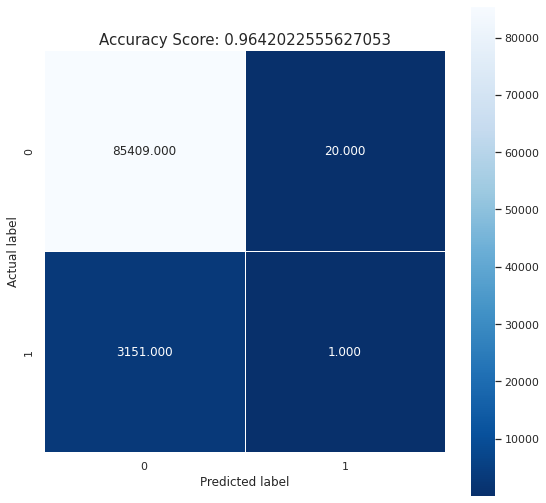

In [137]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### ROC curve for logistic regression


/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


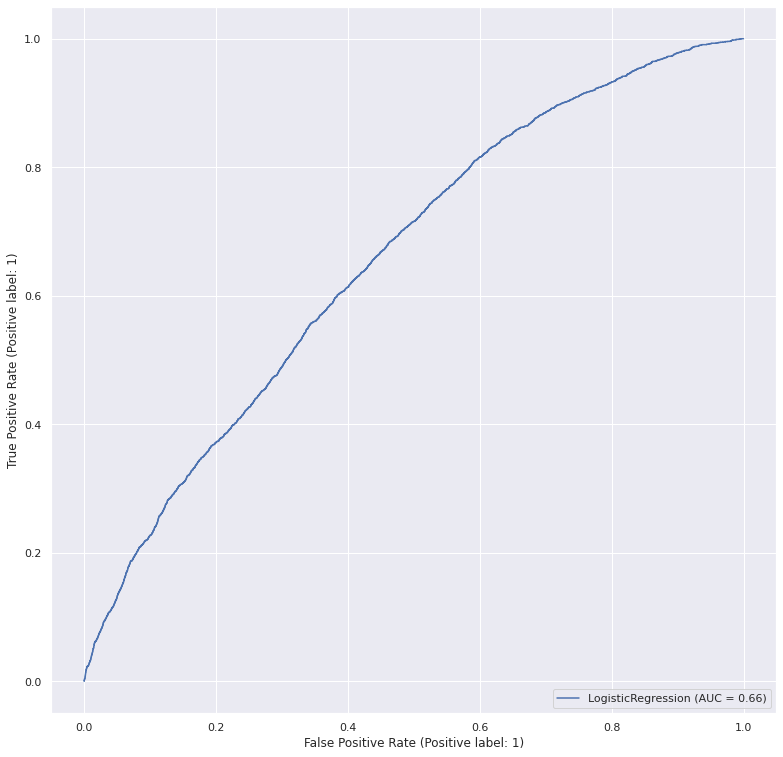

In [138]:
metrics.plot_roc_curve(logisticRegr, x_test, y_test) 

In [139]:
fpr, tpr, thresholds=metrics.roc_curve(y_test,predictions)
# auc score
metrics.auc(fpr, tpr)

0.5000415731726758

### Decision Tree

In [140]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth =10, random_state = 0)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [141]:
predictions = clf.predict(x_test)

In [142]:
score=metrics.accuracy_score(y_test, predictions)
print(score)

0.9725787697135955


In [143]:
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

[[85201   228]
 [ 2201   951]]


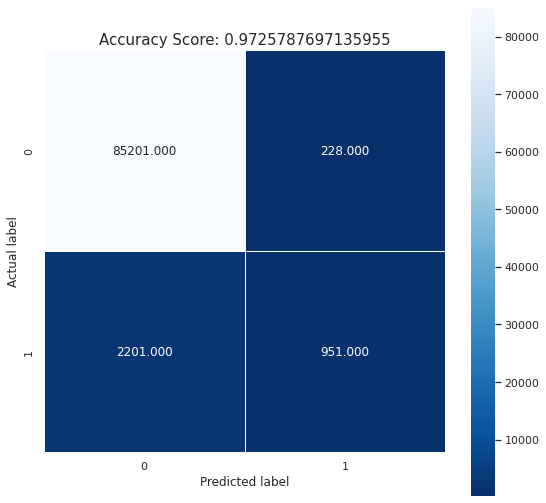

In [144]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

#### ROC curve for decision tree

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


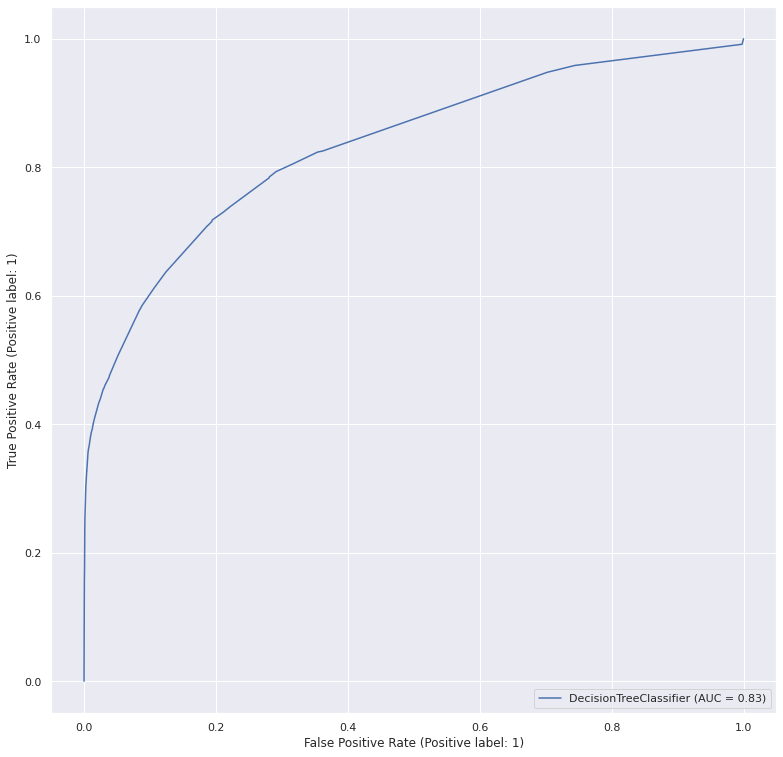

In [145]:
metrics.plot_roc_curve(clf, x_test, y_test) 

In [146]:
fpr, tpr, thresholds=metrics.roc_curve(y_test,predictions)
# auc score
metrics.auc(fpr, tpr)

0.649522157518759

### Random Forest

In [147]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100)

In [148]:
clf.fit(x_train, y_train)
predictions = clf.predict(x_test)


In [149]:
score=metrics.accuracy_score(y_test, predictions)
print(score)

0.9793522312911347


Text(0.5, 1.0, 'Accuracy Score: 0.9793522312911347')

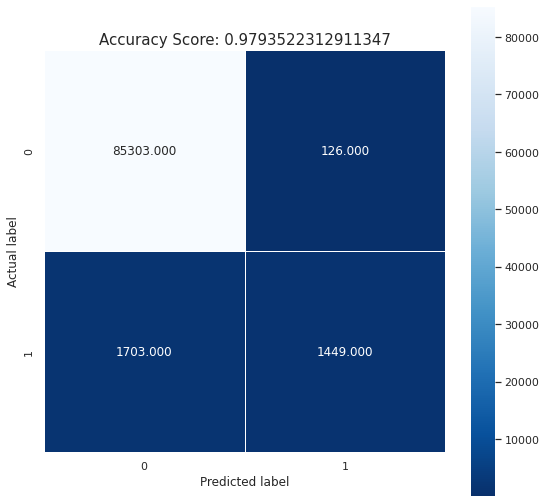

In [150]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15)

#### ROC curve for Random forest




/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


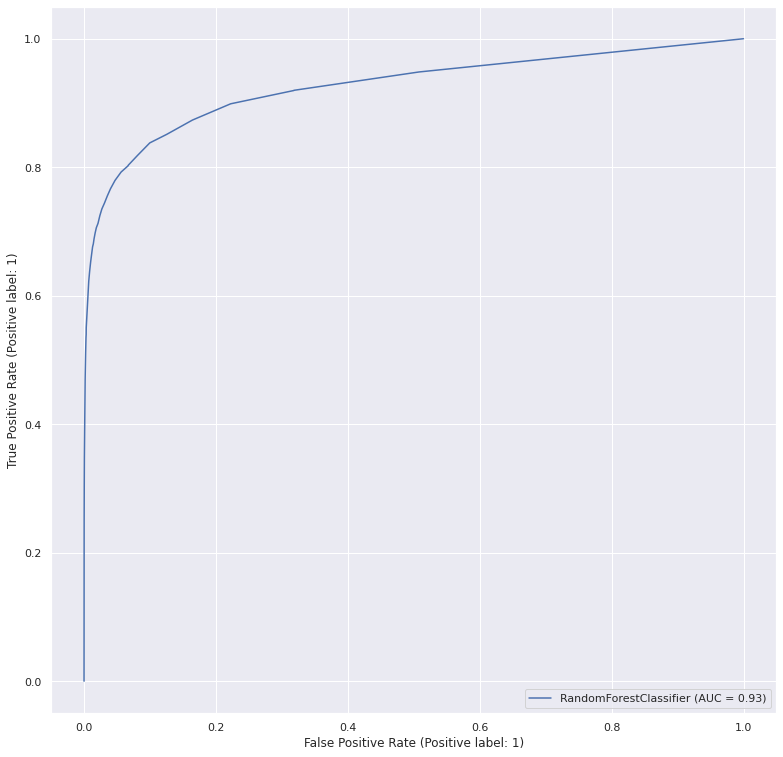

In [151]:
metrics.plot_roc_curve(clf, x_test, y_test) 

In [152]:
fpr, tpr, thresholds=metrics.roc_curve(y_test,predictions)
# auc score
metrics.auc(fpr, tpr)

0.7291166064193301

In [153]:
Test_df_predictions = clf.predict(Test_df)

In [154]:
Test_df_predictions=pd.DataFrame(data=Test_df_predictions,columns=["isFraud"])

In [155]:
Test_df_predictions.head()

isFraud
0        0
1        1
2        0
3        0
4        0

In [156]:
Test_df_predictions.to_csv("./randomforest_predictions.csv")